                                               CURSO CODER HOUSE: DATA SCIENCE II

                                                     TRABAJO PRÁCTICO FINAL

                                                     Alumna: MARIA GONZÁLEZ

                           ANÁLISIS EDA Y APLICACIÓN DE MODELOS DE MACHINE LEARNING NO SUPERVISADOS 
            EN BASE AL DATASET QUE RESUME LOS DATOS DEL CENSO NACIONAL ARGENTINO DE LOS AÑOS 2013, 2017 Y 
                                    2022 SOBRE CONSUMOS CULTURALES (TV, CINE, DIARIO Y RADIO)

Debido a que se trata de un dataset extenso solo se tomarán en cuenta algunas columnas para conocer los valores de esas variables y asi luego poder analizarlas en conjunto. Para ello parto de las siguientes hipótesis:

1.¿Cual es el rango etario que más asiste al cine?
2. ¿El nivel socioeconomico influye en los consumos culturales?
3.¿Hay diferencias de género en los consumos culturales?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [2]:
import os
os.getcwd()

'C:\\Users\\lau_g\\Data Science II'

ESTRUCTURA DEL EDA: 
Preparación de los datos
1.Combinamos conjuntos de datos 
2.Seleccionamos subconjuntos de datos
3.Dividimos el archivo de datos en varias partes
4.Transformamos variables
5.Filtrar y ordenar el dataset
6.Agregar nuevos datos o variables
7.Guardar datos y resultados

EDA: Preparación de los datos

In [4]:
#Leer un archivo CSV
df = pd.read_csv("https://raw.githubusercontent.com/Lauri77/Data-Science-II/refs/heads/main/enc-serie-historica.csv", low_memory=False)

In [5]:
# Mostrar las primeras filas del dataset
print(df.head())

   ID  EXPANSOR    NSE_3  EDICION     GRUPOS_EDAD  EDAD NSE_SOCIOE GENERO  \
0   1     10011    C2+C3     2013   13 A 17 ANIOS  16.0         C3  MUJER   
1   2     12572    C2+C3     2013   50 A 64 ANIOS  53.0         C3  MUJER   
2   3      9911    C2+C3     2013   30 A 49 ANIOS  34.0         C3  VARON   
3   4      8502  D1+D2+E     2013   30 A 49 ANIOS  32.0        D2E  MUJER   
4   5     28593    C2+C3     2013  65 ANIOS Y MAS  89.0         C3  VARON   

   REGION PROVINCIA  ... INT7.4 INT7.5 INT7.6 INT8 INT9 INT10 COMUN4 SOC2  \
0  CENTRO   CORDOBA  ...    NaN    NaN    NaN    2    0   2.0    NaN    4   
1  CENTRO   CORDOBA  ...    NaN    NaN    NaN    0    0   0.0    NaN    2   
2  CENTRO   CORDOBA  ...    NaN    NaN    NaN    2    0   1.0    NaN    5   
3  CENTRO   CORDOBA  ...    NaN    NaN    NaN    0    0   1.0    NaN    7   
4  CENTRO   CORDOBA  ...    NaN    NaN    NaN    0    0   0.0    NaN    1   

                   SOC13.1                SOC13.2  
0  SECUNDARIOS INCOMPL

In [6]:
# Mostrar información sobre el dataset
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9754 entries, 0 to 9753
Data columns (total 139 columns):
 #    Column       Dtype  
---   ------       -----  
 0    ID           int64  
 1    EXPANSOR     int64  
 2    NSE_3        object 
 3    EDICION      int64  
 4    GRUPOS_EDAD  object 
 5    EDAD         float64
 6    NSE_SOCIOE   object 
 7    GENERO       object 
 8    REGION       object 
 9    PROVINCIA    object 
 10   TV1          object 
 11   TV2          object 
 12   TV3_1        object 
 13   TV3_2        object 
 14   TV3_3        object 
 15   TV3_4        object 
 16   TV3_5        object 
 17   TV3_6        object 
 18   TV5_1        object 
 19   TV5_2        object 
 20   TV5_3        object 
 21   TV5_4        object 
 22   TV6.1        object 
 23   TV6.2        object 
 24   TV8.1        object 
 25   TV8.2        object 
 26   TV8.3        object 
 27   TV8.4        float64
 28   TV8.5        float64
 29   CINE1        object 
 30   CINE2        object 
 

In [7]:
# Mostrar información sobre el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9754 entries, 0 to 9753
Columns: 139 entries, ID to SOC13.2
dtypes: float64(16), int64(6), object(117)
memory usage: 10.3+ MB


In [8]:
nan_por_columna = df.isnull().sum()
print(nan_por_columna)

ID                0
EXPANSOR          0
NSE_3             0
EDICION           0
GRUPOS_EDAD       1
               ... 
INT10            61
COMUN4         3574
SOC2              0
SOC13.1        1639
SOC13.2        1422
Length: 139, dtype: int64


In [9]:
# Calcular estadísticas descriptivas
print(df.describe())

                ID       EXPANSOR      EDICION         EDAD        TV8.4  \
count  9754.000000    9754.000000  9754.000000  9753.000000  9407.000000   
mean   4877.500000    8901.966168  2017.266967    41.195940     5.424046   
std    2815.881597   11313.547058     3.802097    19.324797    58.962649   
min       1.000000       2.000000  2013.000000    13.000000     0.000000   
25%    2439.250000    2905.000000  2013.000000    24.000000     1.000000   
50%    4877.500000    4970.000000  2017.000000    39.000000     2.000000   
75%    7315.750000   10858.500000  2022.000000    57.000000     2.000000   
max    9754.000000  247652.000000  2022.000000    92.000000   999.000000   

             TV8.5        CINE4        CINE5        NOTI5       NOTI10  ...  \
count  4887.000000  2235.000000  2211.000000  2355.000000  1325.000000  ...   
mean      1.873542     8.598658     1.088195    17.267091     7.474717  ...   
std       8.872290    69.810637     6.150003   125.765376    68.033127  ...   

In [10]:
# Seleccionar columnas específicas
print(df[["EDAD", "CINE3", "CINE1", "CINE2", "CINE5", "TV8.4", "TV8.5", "PROVINCIA", "SOC13.1", "NSE_SOCIOE", "GENERO", "LIBRO9", "MUSICA12", "NOTI5"]])


      EDAD                         CINE3 CINE1  \
0     16.0  TODOS O CASI TODAS LOS MESES    SI   
1     53.0                           NaN    NO   
2     34.0                           NaN    NO   
3     32.0                           NaN    NO   
4     89.0                           NaN    NO   
...    ...                           ...   ...   
9749  24.0         ALGUNAS VECES AL ANIO    SI   
9750  72.0                           NaN    NO   
9751  42.0                           NaN    NO   
9752  21.0  TODOS O CASI TODAS LOS MESES    SI   
9753  24.0         ALGUNAS VECES AL ANIO    SI   

                                  CINE2  CINE5  TV8.4  TV8.5  \
0                                   NaN    NaN    4.0    NaN   
1                                 NS NC    NaN    1.0    NaN   
2                                 NS NC    NaN    4.0    NaN   
3           NO LE GUSTA/ NO LE INTERESA    NaN    4.0    NaN   
4                                 NS NC    NaN    2.0    NaN   
...            

In [11]:
#filtro = df[columnas_seleccionadas].isnull().any(axis=1)

# Selecciona las filas que no tienen NaN en las columnas seleccionadas
#df_sin_nan = df[~filtro]

#print(df_sin_nan)

In [12]:
df.tail(50)

,ID,EXPANSOR,NSE_3,EDICION,GRUPOS_EDAD,EDAD,NSE_SOCIOE,GENERO,REGION,PROVINCIA,...,INT7.4,INT7.5,INT7.6,INT8,INT9,INT10,COMUN4,SOC2,SOC13.1,SOC13.2
9704,9705,3970,D1+D2+E,2022,18 A 29 ANIOS,20.0,D1,VARON,PATAGONIA,NEUQUEN,...,TODOS O CASI TODOS LOS DIAS,ALGUNAS VECES AL ANIO,NUNCA,1,0,3.0,NO,3,NS NC,PRIMARIOS COMPLETOS
9705,9706,2447,D1+D2+E,2022,65 ANIOS Y MAS,71.0,D1,MUJER,PATAGONIA,NEUQUEN,...,NaN,NaN,NaN,0,0,2.0,NO,2,SECUNDARIOS INCOMPLETOS,SECUNDARIOS INCOMPLETOS
9706,9707,28943,D1+D2+E,2022,65 ANIOS Y MAS,72.0,D1,VARON,PATAGONIA,NEUQUEN,...,NaN,NaN,NaN,0,0,0.0,NO,8,PRIMARIOS INCOMPLETOS,SECUNDARIOS COMPLETOS
9707,9708,5068,D1+D2+E,2022,30 A 49 ANIOS,49.0,D1,MUJER,PATAGONIA,NEUQUEN,...,ALGUNAS VECES A LA SEMANA,ALGUNAS VECES A LA SEMANA,ALGUNAS VECES A LA SEMANA,2,0,4.0,NO,5,SECUNDARIOS COMPLETOS,SECUNDARIOS COMPLETOS
9708,9709,5958,D1+D2+E,2022,30 A 49 ANIOS,32.0,D1,VARON,PATAGONIA,NEUQUEN,...,TODOS O CASI TODOS LOS DIAS,NUNCA,ALGUNAS VECES A LA SEMANA,1,0,3.0,NO,3,SECUNDARIOS COMPLETOS,PRIMARIOS COMPLETOS
9709,9710,20381,D1+D2+E,2022,30 A 49 ANIOS,38.0,D2E,MUJER,PATAGONIA,NEUQUEN,...,ALGUNAS VECES A LA SEMANA,NUNCA,ALGUNAS VECES AL MES,0,0,1.0,SI,9,PRIMARIOS COMPLETOS,PRIMARIOS INCOMPLETOS
9710,9711,4799,D1+D2+E,2022,30 A 49 ANIOS,39.0,D2E,VARON,PATAGONIA,NEUQUEN,...,NUNCA,ALGUNAS VECES AL MES,ALGUNAS VECES AL MES,1,0,2.0,SI,2,SECUNDARIOS INCOMPLETOS,SECUNDARIOS INCOMPLETOS
9711,9712,6085,D1+D2+E,2022,18 A 29 ANIOS,24.0,D1,VARON,PATAGONIA,NEUQUEN,...,NUNCA,NUNCA,TODOS O CASI TODOS LOS DIAS,1,0,3.0,NO,3,UNIVERSITARIOS INCOMPLETOS,PRIMARIOS COMPLETOS
9712,9713,964,ABC1,2022,65 ANIOS Y MAS,69.0,ABC1,MUJER,PATAGONIA,RIO NEGRO,...,ALGUNAS VECES AL MES,ALGUNAS VECES AL MES,ALGUNAS VECES A LA SEMANA,1,0,2.0,SI,2,UNIVERSITARIOS COMPLETOS,TERCIARIOS COMPLETOS
9713,9714,1910,ABC1,2022,13 A 17 ANIOS,13.0,ABC1,VARON,PATAGONIA,RIO NEGRO,...,ALGUNAS VECES A LA SEMANA,ALGUNAS VECES A LA SEMANA,ALGUNAS VECES A LA SEMANA,5,1,5.0,NO,5,SECUNDARIOS INCOMPLETOS,UNIVERSITARIOS COMPLETOS


In [13]:
df.iloc[:, 15:35]

,TV3_4,TV3_5,TV3_6,TV5_1,TV5_2,TV5_3,TV5_4,TV6.1,TV6.2,TV8.1,TV8.2,TV8.3,TV8.4,TV8.5,CINE1,CINE2,CINE3,CINE4,CINE5,NOTI1
0,SI,NaN,NO,SI,SI,SI,NO,NaN,NaN,NaN,NaN,NaN,4.0,NaN,SI,NaN,TODOS O CASI TODAS LOS MESES,NaN,NaN,NO
1,NO,NaN,NO,SI,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NO,NS NC,NaN,NaN,NaN,SI
2,NO,NaN,NO,SI,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NO,NS NC,NaN,NaN,NaN,SI
3,NO,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NO,NO LE GUSTA/ NO LE INTERESA,NaN,NaN,NaN,NaN
4,SI,NaN,NO,SI,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NO,NS NC,NaN,NaN,NaN,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9749,NO,NO,NO,SI,NO,NO,SI,ALGUNAS VECES A LA SEMANA,ALGUNAS VECES A LA SEMANA,NUNCA,ALGUNAS VECES A LA SEMANA,NUNCA,1.0,1.0,SI,NaN,ALGUNAS VECES AL ANIO,7.0,0.0,SI
9750,NO,NO,NO,SI,NO,NO,NO,TODOS O CASI TODOS LOS DIAS,NUNCA,NUNCA,TODOS O CASI TODOS LOS DIAS,NUNCA,2.0,2.0,NO,MOTIVOS ECONOMICOS,NaN,NaN,NaN,SI
9751,NO,NO,NO,SI,NO,NO,NO,TODOS O CASI TODOS LOS DIAS,NUNCA,NUNCA,TODOS O CASI TODOS LOS DIAS,NUNCA,3.0,2.0,NO,PREFIERE VER PELICULAS EN SU CASA,NaN,NaN,NaN,SI
9752,NO,NO,NO,SI,SI,NO,SI,TODOS O CASI TODOS LOS DIAS,TODOS O CASI TODOS LOS DIAS,NUNCA,TODOS O CASI TODOS LOS DIAS,TODOS O CASI TODOS LOS DIAS,5.0,5.0,SI,NaN,TODOS O CASI TODAS LOS MESES,5.0,0.0,SI


In [14]:
# Filtrar filas según una condición
print(df[df["TV8.4"] > 10])

        ID  EXPANSOR    NSE_3  EDICION     GRUPOS_EDAD  EDAD NSE_SOCIOE  \
45      46     11736    C2+C3     2013   13 A 17 ANIOS  13.0         C2   
1497  1498      3211  D1+D2+E     2013  65 ANIOS Y MAS  70.0         D1   
1549  1550     11484    C2+C3     2013   18 A 29 ANIOS  18.0         C3   
1562  1563     35148  D1+D2+E     2013   18 A 29 ANIOS  29.0         D1   
1967  1968      2782    C2+C3     2013  65 ANIOS Y MAS  65.0         C3   
2042  2043      5080  D1+D2+E     2013   50 A 64 ANIOS  54.0         D1   
2071  2072      3047    C2+C3     2013  65 ANIOS Y MAS  83.0         C3   
2465  2466      5051    C2+C3     2013   13 A 17 ANIOS  13.0         C2   
2734  2735      2996  D1+D2+E     2013   18 A 29 ANIOS  25.0         D1   
2751  2752      2535    C2+C3     2013   30 A 49 ANIOS  32.0         C3   
2761  2762      2535    C2+C3     2013   18 A 29 ANIOS  26.0         C2   
2772  2773      2633  D1+D2+E     2013   13 A 17 ANIOS  16.0         D1   
2869  2870      3255  D1+

In [15]:
#Frecuencia con que mira TV
df['TV8.4'].isnull().sum()

347

In [16]:
df["NOTI1"].isnull().sum()

286

In [17]:
df["TV5_4"].isnull().sum()

499

In [18]:
df["TV5_1"].isnull().sum()

495

In [19]:
df["TV8.2"].isnull().sum()

4066

In [20]:
df["CINE1"].isnull().sum()

0

In [21]:
columnas_seleccionadas=["EDAD","NOTI1","TV5_3", "TV5_1", "MUSICA9", "CINE3", "CINE1", "CINE2", "CINE5", "TV8.4", "TV8.5", "PROVINCIA", "SOC13.1", "NSE_SOCIOE", "GENERO", "NOTI5"]
print (columnas_seleccionadas)
filtro = df[columnas_seleccionadas].isnull().any(axis=1)

# Selecciona las filas que no tienen NaN en las columnas seleccionadas
df_sin_nan = df[~filtro]

print(df_sin_nan)

['EDAD', 'NOTI1', 'TV5_3', 'TV5_1', 'MUSICA9', 'CINE3', 'CINE1', 'CINE2', 'CINE5', 'TV8.4', 'TV8.5', 'PROVINCIA', 'SOC13.1', 'NSE_SOCIOE', 'GENERO', 'NOTI5']
Empty DataFrame
Columns: [ID, EXPANSOR, NSE_3, EDICION, GRUPOS_EDAD, EDAD, NSE_SOCIOE, GENERO, REGION, PROVINCIA, TV1, TV2, TV3_1, TV3_2, TV3_3, TV3_4, TV3_5, TV3_6, TV5_1, TV5_2, TV5_3, TV5_4, TV6.1, TV6.2, TV8.1, TV8.2, TV8.3, TV8.4, TV8.5, CINE1, CINE2, CINE3, CINE4, CINE5, NOTI1, NOTI2, NOTI3.1, NOTI5, NOTI8, NOTI10, LIBRO1, LIBRO2, LIBRO3.1, LIBRO3.2, LIBRO4_1, LIBRO4_2, LIBRO4_3, LIBRO4_4, LIBRO5, LIBRO6, LIBRO9, LIBRO13, RADIO1, RADIO2, RADIO3, RADIO5_1, RADIO5_2, RADIO5_3, RADIO5_4, RADIO5_5, MUSICA1, MUSICA2, MUSICA3, MUSICA7_1, MUSICA7_2, MUSICA7_3, MUSICA7_4, MUSICA7_5, MUSICA7_6, MUSICA7_7, MUSICA7_8, MUSICA7_9, MUSICA9, MUSICA10, MUSICA11, MUSICA12, MUSICA13, MUSICA15, VJ1, VJ2, VJ3_1, VJ3_2, VJ3_3, VJ3_4, VJ3_5, VJ3_6, VJ7, TEATRO1, TEATRO3, TEATRO4, PAT1, PAT4, PAT5_1, PAT5_2, PAT5_3, PAT5_4, PAT5_5, PAT5_6, PAT7.1,

In [22]:
df["TV5_3"].isnull().sum()

499

In [23]:
# Filtrar filas según una condición
print(df[df["CINE5"] > 10])

        ID  EXPANSOR    NSE_3  EDICION     GRUPOS_EDAD  EDAD NSE_SOCIOE  \
3821  3822      9694    C2+C3     2017   30 A 49 ANIOS  30.0         C3   
4302  4303      2901    C2+C3     2017   30 A 49 ANIOS  49.0         C3   
4321  4322      2336    C2+C3     2017   30 A 49 ANIOS  35.0         C2   
5297  5298      4485     ABC1     2017   30 A 49 ANIOS  45.0       ABC1   
5726  5727      5683     ABC1     2017   30 A 49 ANIOS  38.0       ABC1   
7386  7387       376    C2+C3     2022   50 A 64 ANIOS  52.0         C3   
7518  7519     18359    C2+C3     2022   30 A 49 ANIOS  36.0         C3   
7841  7842      4261  D1+D2+E     2022   50 A 64 ANIOS  57.0        D2E   
8201  8202       852     ABC1     2022   30 A 49 ANIOS  48.0       ABC1   
8424  8425     33440    C2+C3     2022  65 ANIOS Y MAS  73.0         C2   
8656  8657      6950    C2+C3     2022   18 A 29 ANIOS  22.0         C2   
8756  8757     16321    C2+C3     2022   30 A 49 ANIOS  37.0         C2   
9170  9171      2601  D1+

In [24]:
df_limpio = df.dropna(subset=columnas_seleccionadas)

print(df_limpio)

Empty DataFrame
Columns: [ID, EXPANSOR, NSE_3, EDICION, GRUPOS_EDAD, EDAD, NSE_SOCIOE, GENERO, REGION, PROVINCIA, TV1, TV2, TV3_1, TV3_2, TV3_3, TV3_4, TV3_5, TV3_6, TV5_1, TV5_2, TV5_3, TV5_4, TV6.1, TV6.2, TV8.1, TV8.2, TV8.3, TV8.4, TV8.5, CINE1, CINE2, CINE3, CINE4, CINE5, NOTI1, NOTI2, NOTI3.1, NOTI5, NOTI8, NOTI10, LIBRO1, LIBRO2, LIBRO3.1, LIBRO3.2, LIBRO4_1, LIBRO4_2, LIBRO4_3, LIBRO4_4, LIBRO5, LIBRO6, LIBRO9, LIBRO13, RADIO1, RADIO2, RADIO3, RADIO5_1, RADIO5_2, RADIO5_3, RADIO5_4, RADIO5_5, MUSICA1, MUSICA2, MUSICA3, MUSICA7_1, MUSICA7_2, MUSICA7_3, MUSICA7_4, MUSICA7_5, MUSICA7_6, MUSICA7_7, MUSICA7_8, MUSICA7_9, MUSICA9, MUSICA10, MUSICA11, MUSICA12, MUSICA13, MUSICA15, VJ1, VJ2, VJ3_1, VJ3_2, VJ3_3, VJ3_4, VJ3_5, VJ3_6, VJ7, TEATRO1, TEATRO3, TEATRO4, PAT1, PAT4, PAT5_1, PAT5_2, PAT5_3, PAT5_4, PAT5_5, PAT5_6, PAT7.1, PAT7.2, ...]
Index: []

[0 rows x 139 columns]


In [25]:
cantidad_unicos = df['PROVINCIA'].nunique()
print(cantidad_unicos)

24


In [26]:
cantidad_unicos = df['NSE_SOCIOE'].nunique()
print(cantidad_unicos)

6


In [27]:
#Ctos televisores tiene en su casa?
df['TV8.4'].isnull().sum()

347

In [28]:
tipo_de_datos = df['TV8.4'].dtypes
print(tipo_de_datos)

float64


In [29]:
tipo_de_datos = df['CINE2'].dtypes
print(tipo_de_datos)

object


In [30]:
tipo_de_datos = df['CINE5'].dtypes
print(tipo_de_datos)

float64


In [31]:
tipo_de_datos = df['NOTI1'].dtypes
print(tipo_de_datos)

object


In [32]:
tipo_de_datos = df['CINE1'].dtypes
print(tipo_de_datos)

object


In [33]:
tipo_de_datos = df['TV8.5'].dtypes
print(tipo_de_datos)

float64


In [34]:
tipo_de_datos = df['NOTI5'].dtypes
print(tipo_de_datos)

float64


In [35]:
tipo_de_datos = df['SOC13.1'].dtypes
print(tipo_de_datos)

object


In [36]:
#Frecuencia con que fue al cine
df['CINE3'].isnull().sum()

6479

In [37]:
#Fue al cine en el ultimo año?
df['CINE1'].isnull().sum()

0

In [38]:
#Fue al cine en el ultimo año?
df['CINE2'].isnull().sum()

3562

In [39]:
#Cuantas veces fue a ver peliculas argentinas?
df['CINE5'].isnull().sum()

7543

In [40]:
#Género
df['GENERO'].isnull().sum()

0

In [41]:
#Nivel socioeconómico
df['NSE_SOCIOE'].isnull().sum()

0

In [42]:
#Edad
df['EDAD'].isnull().sum()

1

In [43]:
#Nivel de estudio alcanzado
df['SOC13.1'].isnull().sum()

1639

Como se puede observar, hay faltante de datos en las categorías especificas a consumos culturales, esto puede deberse a varias razones tales como: no utilizo, no me interesa, etc. Por ello, para futuras investigaciones se tratará de sumar variables que tengan que ver con este campo y que ayuden a tener una mayor comprensión sobe este tipo de prácticas.

In [44]:
#LIMPIEZA DE DATOS
df.fillna(0)
print (df)

        ID  EXPANSOR    NSE_3  EDICION     GRUPOS_EDAD  EDAD NSE_SOCIOE  \
0        1     10011    C2+C3     2013   13 A 17 ANIOS  16.0         C3   
1        2     12572    C2+C3     2013   50 A 64 ANIOS  53.0         C3   
2        3      9911    C2+C3     2013   30 A 49 ANIOS  34.0         C3   
3        4      8502  D1+D2+E     2013   30 A 49 ANIOS  32.0        D2E   
4        5     28593    C2+C3     2013  65 ANIOS Y MAS  89.0         C3   
...    ...       ...      ...      ...             ...   ...        ...   
9749  9750      6177    C2+C3     2022   18 A 29 ANIOS  24.0         C3   
9750  9751     12805    C2+C3     2022  65 ANIOS Y MAS  72.0         C3   
9751  9752     10896    C2+C3     2022   30 A 49 ANIOS  42.0         C3   
9752  9753     40401    C2+C3     2022   18 A 29 ANIOS  21.0         C3   
9753  9754      6177    C2+C3     2022   18 A 29 ANIOS  24.0         C3   

     GENERO     REGION         PROVINCIA  ...                       INT7.4  \
0     MUJER     CENTR

In [45]:
df.replace('NS NC',0, inplace=True)
print (df)

        ID  EXPANSOR    NSE_3  EDICION     GRUPOS_EDAD  EDAD NSE_SOCIOE  \
0        1     10011    C2+C3     2013   13 A 17 ANIOS  16.0         C3   
1        2     12572    C2+C3     2013   50 A 64 ANIOS  53.0         C3   
2        3      9911    C2+C3     2013   30 A 49 ANIOS  34.0         C3   
3        4      8502  D1+D2+E     2013   30 A 49 ANIOS  32.0        D2E   
4        5     28593    C2+C3     2013  65 ANIOS Y MAS  89.0         C3   
...    ...       ...      ...      ...             ...   ...        ...   
9749  9750      6177    C2+C3     2022   18 A 29 ANIOS  24.0         C3   
9750  9751     12805    C2+C3     2022  65 ANIOS Y MAS  72.0         C3   
9751  9752     10896    C2+C3     2022   30 A 49 ANIOS  42.0         C3   
9752  9753     40401    C2+C3     2022   18 A 29 ANIOS  21.0         C3   
9753  9754      6177    C2+C3     2022   18 A 29 ANIOS  24.0         C3   

     GENERO     REGION         PROVINCIA  ...                       INT7.4  \
0     MUJER     CENTR

In [46]:
df.replace('NaN',0, inplace=True)
print (df)

        ID  EXPANSOR    NSE_3  EDICION     GRUPOS_EDAD  EDAD NSE_SOCIOE  \
0        1     10011    C2+C3     2013   13 A 17 ANIOS  16.0         C3   
1        2     12572    C2+C3     2013   50 A 64 ANIOS  53.0         C3   
2        3      9911    C2+C3     2013   30 A 49 ANIOS  34.0         C3   
3        4      8502  D1+D2+E     2013   30 A 49 ANIOS  32.0        D2E   
4        5     28593    C2+C3     2013  65 ANIOS Y MAS  89.0         C3   
...    ...       ...      ...      ...             ...   ...        ...   
9749  9750      6177    C2+C3     2022   18 A 29 ANIOS  24.0         C3   
9750  9751     12805    C2+C3     2022  65 ANIOS Y MAS  72.0         C3   
9751  9752     10896    C2+C3     2022   30 A 49 ANIOS  42.0         C3   
9752  9753     40401    C2+C3     2022   18 A 29 ANIOS  21.0         C3   
9753  9754      6177    C2+C3     2022   18 A 29 ANIOS  24.0         C3   

     GENERO     REGION         PROVINCIA  ...                       INT7.4  \
0     MUJER     CENTR

En estos casos, la decisión de realizar la limpieza completando con ceros tuvo que ver con la intención de ajustar y agrupar en ese solo valor las diferencias entre: NULL, Nan y NS NC. 

In [47]:
# Calcular estadísticas descriptivas
print(df.describe())

                ID       EXPANSOR      EDICION         EDAD        TV8.4  \
count  9754.000000    9754.000000  9754.000000  9753.000000  9407.000000   
mean   4877.500000    8901.966168  2017.266967    41.195940     5.424046   
std    2815.881597   11313.547058     3.802097    19.324797    58.962649   
min       1.000000       2.000000  2013.000000    13.000000     0.000000   
25%    2439.250000    2905.000000  2013.000000    24.000000     1.000000   
50%    4877.500000    4970.000000  2017.000000    39.000000     2.000000   
75%    7315.750000   10858.500000  2022.000000    57.000000     2.000000   
max    9754.000000  247652.000000  2022.000000    92.000000   999.000000   

             TV8.5        CINE4        CINE5        NOTI5       NOTI10  ...  \
count  4887.000000  2235.000000  2211.000000  2355.000000  1325.000000  ...   
mean      1.873542     8.598658     1.088195    17.267091     7.474717  ...   
std       8.872290    69.810637     6.150003   125.765376    68.033127  ...   

De esta manera podemos dar cuenta de ciertas medidas estadísticas que podrian darnos la pauta de donde se concentran los datos y de que variables acumulan mayor cantidad de outliers.

In [48]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9754 entries, 0 to 9753
Data columns (total 139 columns):
 #    Column       Dtype  
---   ------       -----  
 0    ID           int64  
 1    EXPANSOR     int64  
 2    NSE_3        object 
 3    EDICION      int64  
 4    GRUPOS_EDAD  object 
 5    EDAD         float64
 6    NSE_SOCIOE   object 
 7    GENERO       object 
 8    REGION       object 
 9    PROVINCIA    object 
 10   TV1          object 
 11   TV2          object 
 12   TV3_1        object 
 13   TV3_2        object 
 14   TV3_3        object 
 15   TV3_4        object 
 16   TV3_5        object 
 17   TV3_6        object 
 18   TV5_1        object 
 19   TV5_2        object 
 20   TV5_3        object 
 21   TV5_4        object 
 22   TV6.1        object 
 23   TV6.2        object 
 24   TV8.1        object 
 25   TV8.2        object 
 26   TV8.3        object 
 27   TV8.4        float64
 28   TV8.5        float64
 29   CINE1        object 
 30   CINE2        object 
 

In [49]:
# Seleccionar columnas específicas
print(df[["NOTI1","TV5_4","TV5_3","TV5_1","MUSICA9","SOC13.1","NOTI5", "CINE3", "CINE1", "CINE2", "CINE5", "TV8.4", "TV8.5", "PROVINCIA", "SOC13.1", "NSE_SOCIOE", "GENERO"]])

     NOTI1 TV5_4 TV5_3 TV5_1 MUSICA9                  SOC13.1  NOTI5  \
0       NO    NO    SI    SI      SI  SECUNDARIOS INCOMPLETOS    NaN   
1       SI    NO    NO    SI      NO                      NaN    NaN   
2       SI    NO    NO    SI      SI   TERCIARIOS INCOMPLETOS    NaN   
3      NaN   NaN   NaN   NaN      NO    PRIMARIOS INCOMPLETOS    NaN   
4       SI    NO    NO    SI      NO                      NaN    NaN   
...    ...   ...   ...   ...     ...                      ...    ...   
9749    SI    SI    NO    SI      SI    SECUNDARIOS COMPLETOS    NaN   
9750    SI    NO    NO    SI      SI  SECUNDARIOS INCOMPLETOS    NaN   
9751    SI    NO    NO    SI      SI     TERCIARIOS COMPLETOS    NaN   
9752    SI    SI    NO    SI      SI  SECUNDARIOS INCOMPLETOS    NaN   
9753    SI    NO    NO    SI      NO    SECUNDARIOS COMPLETOS    NaN   

                             CINE3 CINE1                              CINE2  \
0     TODOS O CASI TODAS LOS MESES    SI                

In [50]:
# Filtrar filas según una condición
print(df[df["TV8.4"] > 10])

        ID  EXPANSOR    NSE_3  EDICION     GRUPOS_EDAD  EDAD NSE_SOCIOE  \
45      46     11736    C2+C3     2013   13 A 17 ANIOS  13.0         C2   
1497  1498      3211  D1+D2+E     2013  65 ANIOS Y MAS  70.0         D1   
1549  1550     11484    C2+C3     2013   18 A 29 ANIOS  18.0         C3   
1562  1563     35148  D1+D2+E     2013   18 A 29 ANIOS  29.0         D1   
1967  1968      2782    C2+C3     2013  65 ANIOS Y MAS  65.0         C3   
2042  2043      5080  D1+D2+E     2013   50 A 64 ANIOS  54.0         D1   
2071  2072      3047    C2+C3     2013  65 ANIOS Y MAS  83.0         C3   
2465  2466      5051    C2+C3     2013   13 A 17 ANIOS  13.0         C2   
2734  2735      2996  D1+D2+E     2013   18 A 29 ANIOS  25.0         D1   
2751  2752      2535    C2+C3     2013   30 A 49 ANIOS  32.0         C3   
2761  2762      2535    C2+C3     2013   18 A 29 ANIOS  26.0         C2   
2772  2773      2633  D1+D2+E     2013   13 A 17 ANIOS  16.0         D1   
2869  2870      3255  D1+

Con esto comprobamos el estado de las columnas del dataset de acuerdo al filtrado de una variable en especifico, en este caso esa variable tiene que ver con la pregunta de la encuesta sobre:Ctos televisores posee en su casa?

In [51]:
df = df.dropna(subset=['TV8.4'])
print (df)

        ID  EXPANSOR    NSE_3  EDICION     GRUPOS_EDAD  EDAD NSE_SOCIOE  \
0        1     10011    C2+C3     2013   13 A 17 ANIOS  16.0         C3   
1        2     12572    C2+C3     2013   50 A 64 ANIOS  53.0         C3   
2        3      9911    C2+C3     2013   30 A 49 ANIOS  34.0         C3   
3        4      8502  D1+D2+E     2013   30 A 49 ANIOS  32.0        D2E   
4        5     28593    C2+C3     2013  65 ANIOS Y MAS  89.0         C3   
...    ...       ...      ...      ...             ...   ...        ...   
9749  9750      6177    C2+C3     2022   18 A 29 ANIOS  24.0         C3   
9750  9751     12805    C2+C3     2022  65 ANIOS Y MAS  72.0         C3   
9751  9752     10896    C2+C3     2022   30 A 49 ANIOS  42.0         C3   
9752  9753     40401    C2+C3     2022   18 A 29 ANIOS  21.0         C3   
9753  9754      6177    C2+C3     2022   18 A 29 ANIOS  24.0         C3   

     GENERO     REGION         PROVINCIA  ...                       INT7.4  \
0     MUJER     CENTR

In [52]:
df = df.dropna(subset=['CINE1'])
print (df)

        ID  EXPANSOR    NSE_3  EDICION     GRUPOS_EDAD  EDAD NSE_SOCIOE  \
0        1     10011    C2+C3     2013   13 A 17 ANIOS  16.0         C3   
1        2     12572    C2+C3     2013   50 A 64 ANIOS  53.0         C3   
2        3      9911    C2+C3     2013   30 A 49 ANIOS  34.0         C3   
3        4      8502  D1+D2+E     2013   30 A 49 ANIOS  32.0        D2E   
4        5     28593    C2+C3     2013  65 ANIOS Y MAS  89.0         C3   
...    ...       ...      ...      ...             ...   ...        ...   
9749  9750      6177    C2+C3     2022   18 A 29 ANIOS  24.0         C3   
9750  9751     12805    C2+C3     2022  65 ANIOS Y MAS  72.0         C3   
9751  9752     10896    C2+C3     2022   30 A 49 ANIOS  42.0         C3   
9752  9753     40401    C2+C3     2022   18 A 29 ANIOS  21.0         C3   
9753  9754      6177    C2+C3     2022   18 A 29 ANIOS  24.0         C3   

     GENERO     REGION         PROVINCIA  ...                       INT7.4  \
0     MUJER     CENTR

 EDA: ANALISIS GRAFICO DE LOS DATOS

count    9406.000000
mean       41.372316
std        19.429974
min        13.000000
25%        24.000000
50%        39.000000
75%        58.000000
max        92.000000
Name: EDAD, dtype: float64


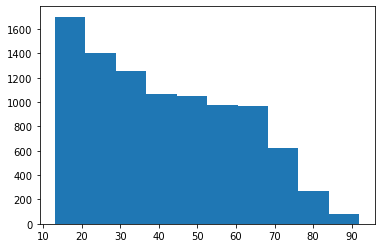

In [53]:
# Análisis descriptivo de la edad
print(df["EDAD"].describe())
plt.hist(df["EDAD"])
plt.show()

En este grafico observamos que la variable Edad es amplia pero despareja en sus valores, aunque se observa una 'meseta' en torno a los 40 años.

In [54]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 9407 entries, 0 to 9753
Data columns (total 139 columns):
 #    Column       Dtype  
---   ------       -----  
 0    ID           int64  
 1    EXPANSOR     int64  
 2    NSE_3        object 
 3    EDICION      int64  
 4    GRUPOS_EDAD  object 
 5    EDAD         float64
 6    NSE_SOCIOE   object 
 7    GENERO       object 
 8    REGION       object 
 9    PROVINCIA    object 
 10   TV1          object 
 11   TV2          object 
 12   TV3_1        object 
 13   TV3_2        object 
 14   TV3_3        object 
 15   TV3_4        object 
 16   TV3_5        object 
 17   TV3_6        object 
 18   TV5_1        object 
 19   TV5_2        object 
 20   TV5_3        object 
 21   TV5_4        object 
 22   TV6.1        object 
 23   TV6.2        object 
 24   TV8.1        object 
 25   TV8.2        object 
 26   TV8.3        object 
 27   TV8.4        float64
 28   TV8.5        float64
 29   CINE1        object 
 30   CINE2        object 
 31   

CINE3
ALGUNAS VECES AL ANIO             2307
TODOS O CASI TODAS LOS MESES       689
TODOS O CASI TODAS LAS SEMANAS     114
NSNC                                23
Name: count, dtype: int64


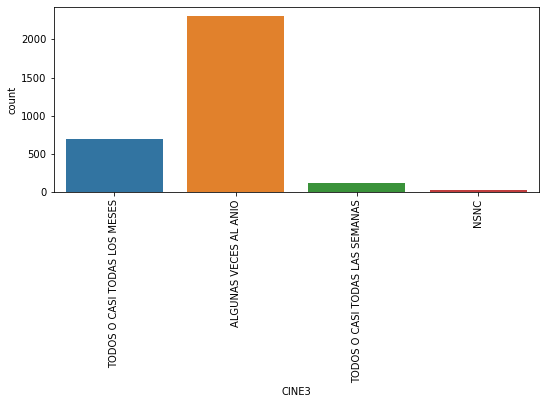

In [55]:
# Frecuencia de las categorías de CINE3
print(df["CINE3"].value_counts())
sns.countplot(x="CINE3", data=df)
# Ejes del gráfico actual
ax = plt.gca()

# Rota las etiquetas del eje x 90 grados
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Ajusta los márgenes para que las etiquetas no se corten
plt.tight_layout()
# Ajuste del tamaño de la figura para que el gráfico sea más alto
plt.gcf().set_size_inches(8, 12)  
plt.show()

En el caso de este gráfico se trata de la variable CINE3 que tiene que ver con la cantidad de veces que se concurrio al cine y aparece como preponderante la opción 'Algunas veces al año´ lo cual nos puede dar la pauta de pensar que esta variable puede ser dependiente de otras tales como: edad, nivel socioeconomico y quizás educación.

EDA: Análisis de correlaciones entre variables y dependencias

In [56]:
#Grafico de barras sobre CINE1 Y NSE_SOCIOE

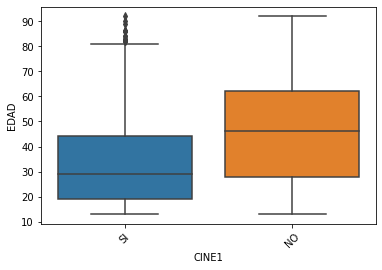

In [57]:
# Diagrama de dispersión entre edad y CINE3 (df[“EDAD”], df[“CINE1”])

sns.boxplot(x='CINE1', y='EDAD', data=df) 
plt.xticks(rotation=45) 
plt.show()

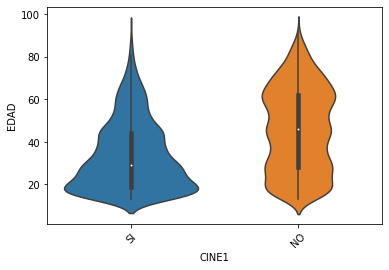

In [58]:
sns.violinplot(x='CINE1', y='EDAD', data=df) 
plt.xticks(rotation=45) 
plt.show()

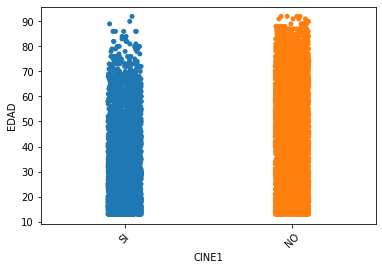

In [59]:
sns.stripplot(x='CINE1', y='EDAD', data=df, jitter=True) 
plt.xticks(rotation=45) 
plt.show()

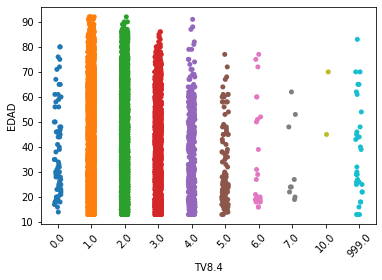

In [60]:
sns.stripplot(x='TV8.4', y='EDAD', data=df, jitter=True) 
plt.xticks(rotation=45) 
plt.show()

Del grafico de dispersión anterior encontramos que la media de posesión de televisores en casa tiene que ver con 1, 2 y 3 en edades que van desde antes de los 20 hasta los 70 de manera sostenida. Luego se perciben ciertos outliers o casos raros a partir del 5to televisor y de edades cercanas a los 90 años.

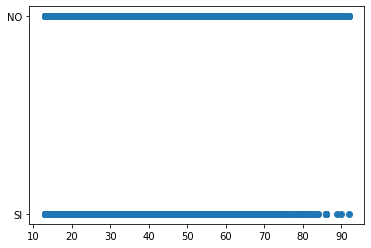

In [61]:
# Diagrama de dispersión entre edad y CINE1
plt.scatter(df["EDAD"], df["CINE1"])
plt.show()

Este gráfico muestra que la concurrencia al cine aparece más sostenida del lado del no que del si en cuanto a las edades analizadas. Sin embargo, se observa un tramo bastante parejo entre ambas opciones hasta los 80 años. 

#EDA: Evaluación de supuestos distribucionales y asimetría

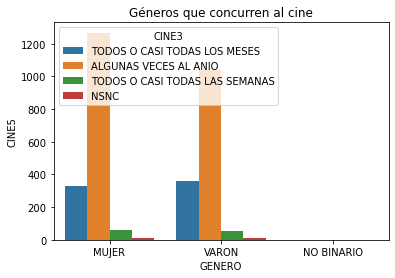

In [62]:
#Visualización de los resultados en un gráfico de barras
sns.countplot(x="GENERO", hue="CINE3", data=df)
plt.title('Géneros que concurren al cine')
plt.xlabel('GENERO')
plt.ylabel('CINE5')
plt.show()

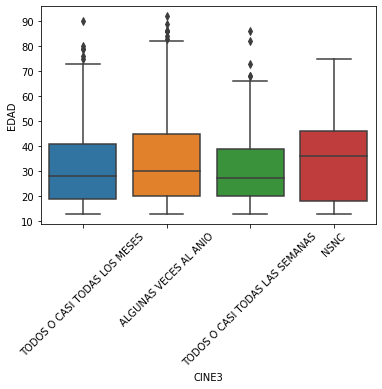

In [63]:
sns.boxplot(x='CINE3', y='EDAD', data=df) 
plt.xticks(rotation=45)
plt.show()

En el gráfico anterior se puede observar que la media entre cine y edad se encuentra en torno a los 30 años.

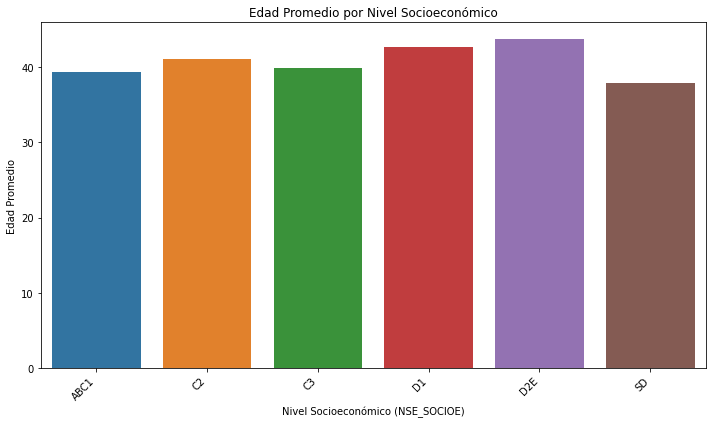

In [64]:
# Cálculo de la edad promedio para cada categoría socioeconómica
edad_por_nse = df.groupby('NSE_SOCIOE')['EDAD'].mean().reset_index()

# Gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(x='NSE_SOCIOE', y='EDAD', data=edad_por_nse)

# Etiquetas y título
plt.xlabel("Nivel Socioeconómico (NSE_SOCIOE)")
plt.ylabel("Edad Promedio")
plt.title("Edad Promedio por Nivel Socioeconómico")

# Muestra el gráfico
plt.xticks(rotation=45, ha='right') # Rotación de las etiquetas del eje x
plt.tight_layout()
plt.show()

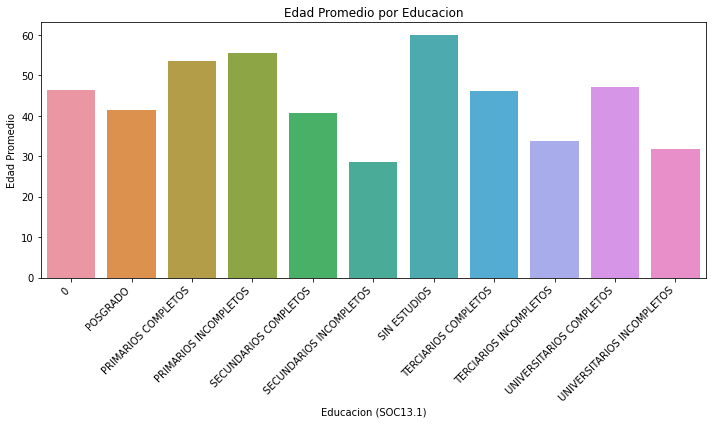

In [65]:
# Cálculo de la edad promedio para cada categoría educativa
# Orden de las categorías
orden_educacion = ['Primaria incompleta', 'Primaria completa', 'Secundaria incompleta', 
                   'Secundaria completa', 'Terciaria incompleta', 'Terciaria completa', 
                   'Universitaria incompleta', 'Universitaria completa', 'Posgrado']
edad_por_nse = df.groupby('SOC13.1')['EDAD'].mean().reset_index()

# Gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(x='SOC13.1', y='EDAD', data=edad_por_nse)

# Etiquetas y título
plt.xlabel("Educacion (SOC13.1)")
plt.ylabel("Edad Promedio")
plt.title("Edad Promedio por Educacion")

# Muestro el gráfico
plt.xticks(rotation=45, ha='right') # Rotación de las etiquetas del eje x
plt.tight_layout()
plt.show()

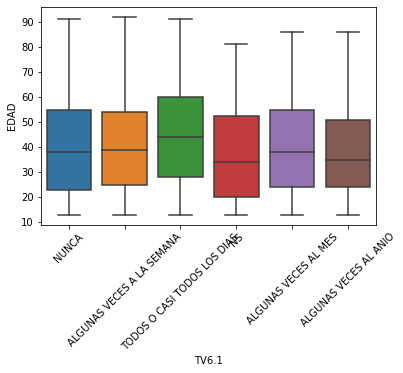

In [66]:
sns.boxplot(x='TV6.1', y='EDAD', data=df) 
plt.xticks(rotation=45)
plt.show()

En el gráfico anterior ecnontramos que , para el caso de consumo de programas televisivos, no se muestran outliers, y la media está entre los 40 y 45 años de edad de los públicos que ven televisión.

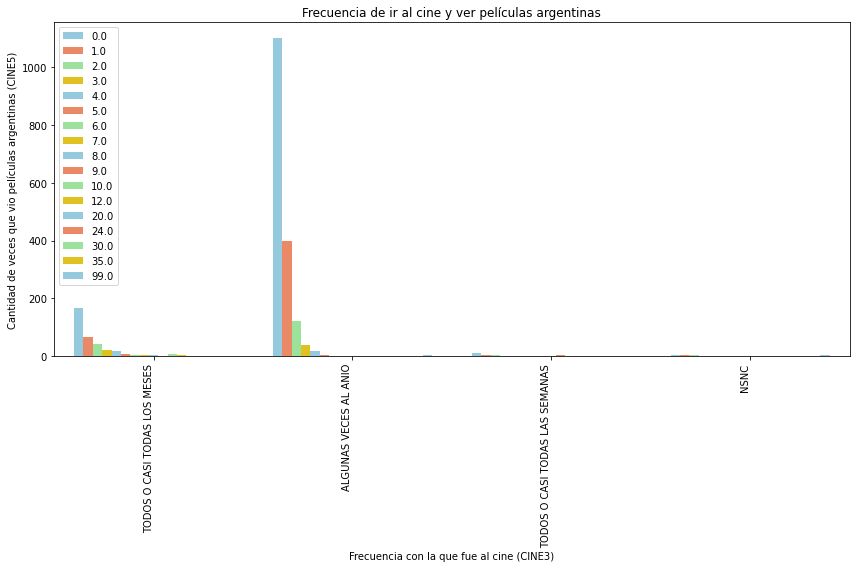

In [67]:
# Armado de la figura

plt.figure(figsize=(12, 8))

# Paleta de colores

colores = ["skyblue", "coral", "lightgreen", "gold"]

# Gráfica 

sns.countplot(x="CINE3", hue="CINE5", data=df, palette=colores)

# Etiquetas y título

plt.xlabel("Frecuencia con la que fue al cine (CINE3)")

plt.ylabel("Cantidad de veces que vio películas argentinas (CINE5)")

plt.title("Frecuencia de ir al cine y ver películas argentinas")

# Rotación

plt.xticks(rotation=90, ha='right')

plt.legend(loc='upper left')

plt.subplots_adjust(bottom=0.2, left=0.15)

# Ajustes de la figura

plt.tight_layout()

plt.show()

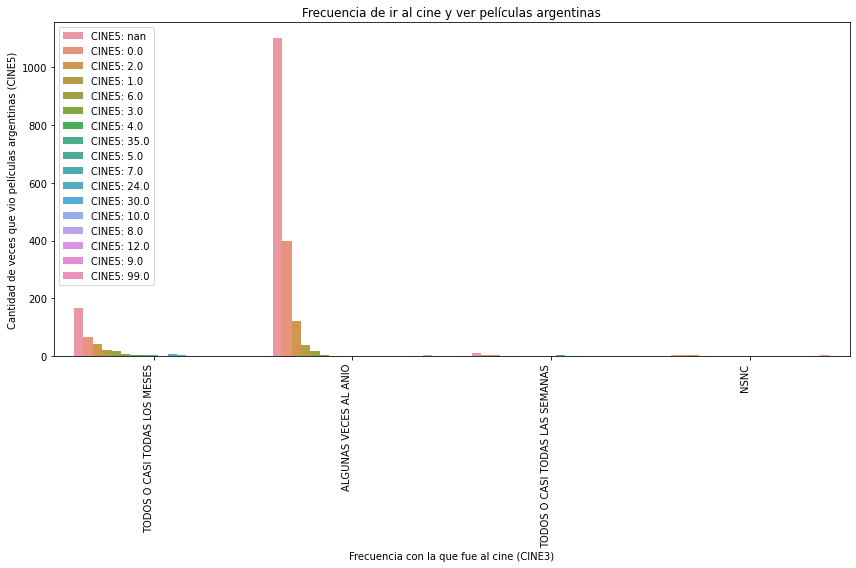

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Creo el gráfico de barras agrupadas
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="CINE3", hue="CINE5", data=df)

# Añado etiquetas y título
plt.xlabel("Frecuencia con la que fue al cine (CINE3)")
plt.ylabel("Cantidad de veces que vio películas argentinas (CINE5)")
plt.title("Frecuencia de ir al cine y ver películas argentinas")

# Ajustes adicionales
plt.xticks(rotation=90, ha='right')
plt.subplots_adjust(bottom=0.2, left=0.15)

# Obtengo los nombres de las categorías de CINE5
cine5_categories = df["CINE5"].unique()

# Creo una lista de etiquetas para la leyenda
legend_labels = [f"CINE5: {cat}" for cat in cine5_categories]

# Modifico la leyenda para mostrar las etiquetas correctas
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels, loc='upper left')

colores = ["skyblue", "coral", "lightgreen", "gold"]
sns.set_palette(colores)

plt.tight_layout()
plt.show()

En este gráfico de barras se puede observar que la variable CINE5 que corresponde a la cantidad de veces que la persona fue a ver una pelicula argentina asume diversos valores. 

Conclusiones Parciales:
    De lo anterior podemos advertir que la juventud de los 20 no lidera las visitas al cine, sino que la media se centra más en torno a los 40 años. Pudimos observar la aparición de varios casos de outliers lo cual da la pista de que en determinados sectores etarios la distribución no es normal y que tiene que ver con la edad, la concurrencia o no al cine, la disponibilidad y utilización de la televisión, la elección de propuestas argentinas, el nivel socioeconomico y tambien el educativo. Respecto a los datos ausentes, notamos que el impacto de estos en variables relacionadas de forma directa con el consumo de productos culturales fue mas elevada que en datos tipicos de censo como: edad, educación, nivel socioeconomico y género.El impacto de esto puede aminorarse a futuro si se agregan otras variables tales consumo de libros, musica, teatro, etc.

### Preprocesamiento de los datos

In [69]:
columnas_seleccionadas=["EDAD","RADIO1", "NOTI1","TV5_3", "TV5_1", "MUSICA9", "CINE3", "CINE1", "CINE2", "CINE5", "TV8.4", "TV8.5", "PROVINCIA", "SOC13.1", "NSE_SOCIOE", "GENERO", "NOTI5"]
print (columnas_seleccionadas)
filtro = df[columnas_seleccionadas].isnull().any(axis=1)


['EDAD', 'RADIO1', 'NOTI1', 'TV5_3', 'TV5_1', 'MUSICA9', 'CINE3', 'CINE1', 'CINE2', 'CINE5', 'TV8.4', 'TV8.5', 'PROVINCIA', 'SOC13.1', 'NSE_SOCIOE', 'GENERO', 'NOTI5']


In [70]:
moda_NOTI1 = df["NOTI1"].mode()[0]
print (moda_NOTI1)

SI


In [71]:
moda_CINE1 = df["CINE1"].mode()[0]
print (moda_NOTI1)

SI


In [72]:
moda_TV5_4 = df["TV5_4"].mode()[0]
print (moda_TV5_4)

NO


In [73]:
moda_TV5_3 = df["TV5_3"].mode()[0]
print (moda_TV5_3)

NO


In [74]:
moda_TV5_1 = df["TV5_1"].mode()[0]
print (moda_TV5_1)

SI


In [75]:
moda_MUSICA9= df["MUSICA9"].mode()[0]
print (moda_MUSICA9)

NO


In [76]:
moda_CINE3= df["CINE3"].mode()[0]
print (moda_CINE3)

ALGUNAS VECES AL ANIO


In [77]:
moda_PROVINCIA= df["PROVINCIA"].mode()[0]
print (moda_PROVINCIA)

BUENOS AIRES


In [78]:
moda_NSE_SOCIOE= df["NSE_SOCIOE"].mode()[0]
print (moda_NSE_SOCIOE)

D1


In [79]:
moda_GENERO= df["GENERO"].mode()[0]
print (moda_GENERO)

MUJER


In [80]:
moda_CINE2= df["CINE2"].mode()[0]
print (moda_CINE2)

MOTIVOS ECONOMICOS


In [81]:
moda_SOC13= df["SOC13.1"].mode()[0]
print (moda_SOC13)

SECUNDARIOS INCOMPLETOS


In [82]:
moda_RADIO1= df["RADIO1"].mode()[0]
print (moda_RADIO1)

SI


In [83]:
# El DataFrame se llama 'df'
columnas_a_llenar = ["NOTI1", "CINE1", "CINE2", "CINE3", "CINE5", "TV5_1", "TV5_3", "TV5_4", "SOC13.1", "GENERO", "NSE_SOCIOE", "PROVINCIA", "MUSICA9"]

for columna in columnas_a_llenar:
    moda = df[columna].mode()[0]
    df[columna] = df[columna].fillna(moda)

# Ahora, todas las columnas especificadas tienen los NaN llenos con la moda.

print(df)

        ID  EXPANSOR    NSE_3  EDICION     GRUPOS_EDAD  EDAD NSE_SOCIOE  \
0        1     10011    C2+C3     2013   13 A 17 ANIOS  16.0         C3   
1        2     12572    C2+C3     2013   50 A 64 ANIOS  53.0         C3   
2        3      9911    C2+C3     2013   30 A 49 ANIOS  34.0         C3   
3        4      8502  D1+D2+E     2013   30 A 49 ANIOS  32.0        D2E   
4        5     28593    C2+C3     2013  65 ANIOS Y MAS  89.0         C3   
...    ...       ...      ...      ...             ...   ...        ...   
9749  9750      6177    C2+C3     2022   18 A 29 ANIOS  24.0         C3   
9750  9751     12805    C2+C3     2022  65 ANIOS Y MAS  72.0         C3   
9751  9752     10896    C2+C3     2022   30 A 49 ANIOS  42.0         C3   
9752  9753     40401    C2+C3     2022   18 A 29 ANIOS  21.0         C3   
9753  9754      6177    C2+C3     2022   18 A 29 ANIOS  24.0         C3   

     GENERO     REGION         PROVINCIA  ...                       INT7.4  \
0     MUJER     CENTR

In [84]:
# Selecciono las columnas
columnas_a_seleccionar = ["RADIO1","NOTI1", "CINE1", "TV8.4", "TV5_4", "TV5_3", "TV5_1", "MUSICA9", "CINE3", "EDAD", "PROVINCIA", "NSE_SOCIOE", "GENERO", "CINE2", "TV8.5", "SOC13.1", "NOTI5"]

# Crea un nuevo DataFrame con las columnas seleccionadas
df_seleccionado = df[columnas_a_seleccionar]

# Ahora, 'df_seleccionado' contiene solo las columnas que especificadas

print(df_seleccionado)

     RADIO1 NOTI1 CINE1  TV8.4 TV5_4 TV5_3 TV5_1 MUSICA9  \
0        SI    NO    SI    4.0    NO    SI    SI      SI   
1        SI    SI    NO    1.0    NO    NO    SI      NO   
2        NO    SI    NO    4.0    NO    NO    SI      SI   
3        SI    SI    NO    4.0    NO    NO    SI      NO   
4        SI    SI    NO    2.0    NO    NO    SI      NO   
...     ...   ...   ...    ...   ...   ...   ...     ...   
9749     NO    SI    SI    1.0    SI    NO    SI      SI   
9750     NO    SI    NO    2.0    NO    NO    SI      SI   
9751     SI    SI    NO    3.0    NO    NO    SI      SI   
9752     SI    SI    SI    5.0    SI    NO    SI      SI   
9753     SI    SI    SI    3.0    NO    NO    SI      NO   

                             CINE3  EDAD         PROVINCIA NSE_SOCIOE GENERO  \
0     TODOS O CASI TODAS LOS MESES  16.0           CORDOBA         C3  MUJER   
1            ALGUNAS VECES AL ANIO  53.0           CORDOBA         C3  MUJER   
2            ALGUNAS VECES AL ANIO  34.

In [85]:
#Limpieza de columnas
columnas_a_limpiar = ["TV8.5", "NOTI5", "EDAD", "TV8.4", "RADIO1"]

for columna in columnas_a_limpiar:
    moda = df_seleccionado[columna].mode()[0]
    df_seleccionado.loc[:, columna] = df_seleccionado[columna].fillna(moda)

# Ahora, todas las columnas especificadas tienen los NaN llenos con la moda.
print(df_seleccionado)

     RADIO1 NOTI1 CINE1  TV8.4 TV5_4 TV5_3 TV5_1 MUSICA9  \
0        SI    NO    SI    4.0    NO    SI    SI      SI   
1        SI    SI    NO    1.0    NO    NO    SI      NO   
2        NO    SI    NO    4.0    NO    NO    SI      SI   
3        SI    SI    NO    4.0    NO    NO    SI      NO   
4        SI    SI    NO    2.0    NO    NO    SI      NO   
...     ...   ...   ...    ...   ...   ...   ...     ...   
9749     NO    SI    SI    1.0    SI    NO    SI      SI   
9750     NO    SI    NO    2.0    NO    NO    SI      SI   
9751     SI    SI    NO    3.0    NO    NO    SI      SI   
9752     SI    SI    SI    5.0    SI    NO    SI      SI   
9753     SI    SI    SI    3.0    NO    NO    SI      NO   

                             CINE3  EDAD         PROVINCIA NSE_SOCIOE GENERO  \
0     TODOS O CASI TODAS LOS MESES  16.0           CORDOBA         C3  MUJER   
1            ALGUNAS VECES AL ANIO  53.0           CORDOBA         C3  MUJER   
2            ALGUNAS VECES AL ANIO  34.

In [86]:
columnas_a_llenar_promedio = ["TV8.5", "NOTI5", "EDAD", "TV8.4"]

for columna in columnas_a_llenar_promedio:
# Calculo el promedio de la columna
    promedio = df_seleccionado[columna].mean()

# Lleno los NaN con el promedio
    df_seleccionado[columna] = df_seleccionado[columna].fillna(promedio)

# Ahora, todas las columnas especificadas tienen los NaN llenos con el promedio.

print(df_seleccionado)

     RADIO1 NOTI1 CINE1  TV8.4 TV5_4 TV5_3 TV5_1 MUSICA9  \
0        SI    NO    SI    4.0    NO    SI    SI      SI   
1        SI    SI    NO    1.0    NO    NO    SI      NO   
2        NO    SI    NO    4.0    NO    NO    SI      SI   
3        SI    SI    NO    4.0    NO    NO    SI      NO   
4        SI    SI    NO    2.0    NO    NO    SI      NO   
...     ...   ...   ...    ...   ...   ...   ...     ...   
9749     NO    SI    SI    1.0    SI    NO    SI      SI   
9750     NO    SI    NO    2.0    NO    NO    SI      SI   
9751     SI    SI    NO    3.0    NO    NO    SI      SI   
9752     SI    SI    SI    5.0    SI    NO    SI      SI   
9753     SI    SI    SI    3.0    NO    NO    SI      NO   

                             CINE3  EDAD         PROVINCIA NSE_SOCIOE GENERO  \
0     TODOS O CASI TODAS LOS MESES  16.0           CORDOBA         C3  MUJER   
1            ALGUNAS VECES AL ANIO  53.0           CORDOBA         C3  MUJER   
2            ALGUNAS VECES AL ANIO  34.

<ipython-input-86-1e26702a2670>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleccionado[columna] = df_seleccionado[columna].fillna(promedio)


## MODELOS DE MACHINE LEARNING

Ingeniería de Atributos: 
Crear variables sintéticas adicionales que permitan mejorar el desempeño del modelo ML.
Testear modelos. 
Determinar si alguno presenta over o underfitting y relacionar la conclusión con el trade-off entre bias y variance.
Realizar PCA  sobre las variables usadas y explorar las cargas de los dos primeros  componentes.
Identificar las variables más relevantes.


Preguntas para responder con modelo de ML no supervisados:
-Descubrir patrones de consumo

Para ello se procederá a depurar la base de datos dejando solamente aquellas columnas que poseen mas del 50 porciento de los datos, para el resto de los casos se reemplazarán los datos faltantes: numeros serán reemplazados por la media, los categóricos por frecuencia relativa de cada uno de los valores y se mantendrá la misma proporción para rellenar los datos vacios (no se usa la moda porque al haber muchos datos faltantes podria modificar considerablemente los datos existentes).

In [87]:
import pandas as pd
import numpy as np

# Cargo el dataset original
df = pd.read_csv("enc-serie-historica.csv", low_memory=False)

#Identifico columnas con valores faltantes
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

df_missing = pd.DataFrame({
    'Columna': missing_values.index, 
    'Valores Faltantes': missing_values.values, 
    'Porcentaje_Faltante': missing_percent.values, 
    'Tipo_de_Dato': df.dtypes.values
})

# Elimino columnas con más del 51% de datos faltantes
cols_to_drop = df_missing[df_missing['Porcentaje_Faltante'] > 51]['Columna'].tolist()
df.drop(columns=cols_to_drop, inplace=True)

print(f"Columnas eliminadas: {cols_to_drop}")

#Relleno de valores faltantes según el tipo de dato
for col in df_missing[df_missing['Porcentaje_Faltante'] < 50]['Columna']:
    if col in df.columns:  # Verificar que la columna existe en df
        if np.issubdtype(df[col].dtype, np.number):
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            value_counts = df[col].dropna().value_counts(normalize=True)
            missing_count = df[col].isnull().sum()
            sampled_values = np.random.choice(value_counts.index, size=missing_count, p=value_counts.values)
            df.loc[df[col].isnull(), col] = sampled_values

# Última verificación: ¿Todavía quedan valores nulos?
print("Valores nulos después del procesamiento:")
print(df_seleccionado.isnull().sum())

Columnas eliminadas: ['TV2', 'TV3_5', 'CINE3', 'CINE4', 'CINE5', 'NOTI2', 'NOTI5', 'NOTI10', 'LIBRO2', 'LIBRO3.2', 'LIBRO4_1', 'LIBRO4_2', 'LIBRO4_3', 'LIBRO4_4', 'LIBRO6', 'LIBRO9', 'LIBRO13', 'RADIO2', 'RADIO3', 'MUSICA2', 'MUSICA7_6', 'MUSICA11', 'MUSICA12', 'MUSICA13', 'VJ2', 'VJ3_1', 'VJ3_2', 'VJ3_3', 'VJ3_4', 'VJ3_5', 'VJ3_6', 'VJ7', 'TEATRO3', 'TEATRO4', 'PAT4', 'PAT5_1', 'PAT5_2', 'PAT5_3', 'PAT5_4', 'PAT5_5', 'PAT5_6', 'INT2', 'INT6_1', 'INT6_2', 'INT6_7']
Valores nulos después del procesamiento:
RADIO1        0
NOTI1         0
CINE1         0
TV8.4         0
TV5_4         0
TV5_3         0
TV5_1         0
MUSICA9       0
CINE3         0
EDAD          0
PROVINCIA     0
NSE_SOCIOE    0
GENERO        0
CINE2         0
TV8.5         0
SOC13.1       0
NOTI5         0
dtype: int64


In [88]:
df_seleccionado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9407 entries, 0 to 9753
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RADIO1      9407 non-null   object 
 1   NOTI1       9407 non-null   object 
 2   CINE1       9407 non-null   object 
 3   TV8.4       9407 non-null   float64
 4   TV5_4       9407 non-null   object 
 5   TV5_3       9407 non-null   object 
 6   TV5_1       9407 non-null   object 
 7   MUSICA9     9407 non-null   object 
 8   CINE3       9407 non-null   object 
 9   EDAD        9407 non-null   float64
 10  PROVINCIA   9407 non-null   object 
 11  NSE_SOCIOE  9407 non-null   object 
 12  GENERO      9407 non-null   object 
 13  CINE2       9407 non-null   object 
 14  TV8.5       9407 non-null   float64
 15  SOC13.1     9407 non-null   object 
 16  NOTI5       9407 non-null   float64
dtypes: float64(4), object(13)
memory usage: 1.3+ MB


In [89]:
#Chequeo de categorias de las variables objeto
categorias_unicas_CINE1 = df_seleccionado ["CINE1"].unique()
print(categorias_unicas_CINE1)

['SI' 'NO']


In [90]:
valores_unicos_genero = df_seleccionado["GENERO"].unique()
print(valores_unicos_genero)

['MUJER' 'VARON' 'NO BINARIO']


In [91]:
#Chequeo de valores únicos para esta columna "NSE_SOCIOE" orden en forma alafabetica ascendente y descendente numérica. ej: A es mayor que B, C1 es mayor que C3
valores_unicos_SOC13 = df_seleccionado ["SOC13.1"].unique()
print(valores_unicos_SOC13)

['SECUNDARIOS INCOMPLETOS' 'TERCIARIOS INCOMPLETOS'
 'PRIMARIOS INCOMPLETOS' 'SECUNDARIOS COMPLETOS' 'PRIMARIOS COMPLETOS'
 'UNIVERSITARIOS INCOMPLETOS' 'UNIVERSITARIOS COMPLETOS' 'POSGRADO'
 'TERCIARIOS COMPLETOS' 'SIN ESTUDIOS' 0]


In [92]:
def transformar_soc13_1(df):
    """Transforma la columna 'SOC13.1' a datos ordinales."""

# Mapeo ordinal
    mapeo_soc13_1 = {
        'SIN ESTUDIOS': 1,
        'PRIMARIOS INCOMPLETOS': 2,
        'PRIMARIOS COMPLETOS': 3,
        'SECUNDARIOS INCOMPLETOS': 4,
        'SECUNDARIOS COMPLETOS': 5,
        'TERCIARIOS INCOMPLETOS': 6,
        'TERCIARIOS COMPLETOS': 7,
        'UNIVERSITARIOS INCOMPLETOS': 8,
        'UNIVERSITARIOS COMPLETOS': 9,
        'POSGRADO': 10,
        0: 0  # Manejar el valor 0 como "Sin Datos"
    }

# Aplico el mapeo
    df['SOC13_1_NUM'] = df['SOC13.1'].map(mapeo_soc13_1)

    return df

# Ejemplo de uso (asumiendo que tu DataFrame se llama 'df_seleccionado')
df_seleccionado = transformar_soc13_1(df_seleccionado)

# Verifico los resultados
print(df_seleccionado[['SOC13.1', 'SOC13_1_NUM']].head(20))
print(df_seleccionado['SOC13_1_NUM'].value_counts())
print(df_seleccionado.dtypes)

                       SOC13.1  SOC13_1_NUM
0      SECUNDARIOS INCOMPLETOS            4
1      SECUNDARIOS INCOMPLETOS            4
2       TERCIARIOS INCOMPLETOS            6
3        PRIMARIOS INCOMPLETOS            2
4      SECUNDARIOS INCOMPLETOS            4
5        SECUNDARIOS COMPLETOS            5
6      SECUNDARIOS INCOMPLETOS            4
7          PRIMARIOS COMPLETOS            3
8      SECUNDARIOS INCOMPLETOS            4
9      SECUNDARIOS INCOMPLETOS            4
10     SECUNDARIOS INCOMPLETOS            4
11      TERCIARIOS INCOMPLETOS            6
12       PRIMARIOS INCOMPLETOS            2
13  UNIVERSITARIOS INCOMPLETOS            8
14     SECUNDARIOS INCOMPLETOS            4
15       SECUNDARIOS COMPLETOS            5
16     SECUNDARIOS INCOMPLETOS            4
17     SECUNDARIOS INCOMPLETOS            4
18     SECUNDARIOS INCOMPLETOS            4
19       SECUNDARIOS COMPLETOS            5
SOC13_1_NUM
4     3641
5     1938
3     1017
8      717
7      642
9      51

In [93]:
categorias_unicas_CINE2 = df_seleccionado["CINE2"].unique()
print(categorias_unicas_CINE2)

['MOTIVOS ECONOMICOS' 0 'NO LE GUSTA/ NO LE INTERESA'
 'PROBLEMAS DE SALUD/ EDAD AVANZADA'
 'TIENE QUE CUIDAR HIJOS/AS - FAMILIARES'
 'NO LE INTERESAN LAS PELICULAS QUE SE ESTRENAN'
 'NO TENGO NINGUN CINE CERCA' 'FALTA DE TIEMPO'
 'PREFIERE VER PELICULAS EN SU CASA' 'MIEDO AL CONTAGIO/ PANDEMIA'
 'FALTA DE HABITO/ COSTUMBRE' 'NO TIENE CON QUIEN IR' 'OTRO'
 'SEGURIDAD/ MOVILIDAD' 'NO SE DA LA OPORTUNIDAD'
 'PREFIERE OTRAS ACTIVIDADES' 'NUNCA FUE' 'CERRADOS POR LA PANDEMIA']


CINE2
MOTIVOS ECONOMICOS                               4830
NO LE INTERESAN LAS PELICULAS QUE SE ESTRENAN     961
NO LE GUSTA/ NO LE INTERESA                       907
TIENE QUE CUIDAR HIJOS/AS - FAMILIARES            839
NO TENGO NINGUN CINE CERCA                        528
0                                                 428
PREFIERE VER PELICULAS EN SU CASA                 367
PROBLEMAS DE SALUD/ EDAD AVANZADA                 259
MIEDO AL CONTAGIO/ PANDEMIA                        97
FALTA DE TIEMPO                                    83
CERRADOS POR LA PANDEMIA                           58
NO TIENE CON QUIEN IR                              11
NO SE DA LA OPORTUNIDAD                            11
OTRO                                                8
FALTA DE HABITO/ COSTUMBRE                          6
SEGURIDAD/ MOVILIDAD                                6
NUNCA FUE                                           5
PREFIERE OTRAS ACTIVIDADES                          3
Name: count, dtype: in

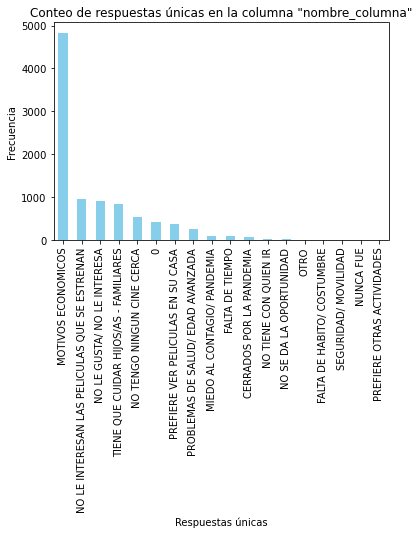

In [94]:
# Selecciono la columna que quiero analizar 
columna = df_seleccionado['CINE2']

# Cuento las respuestas únicas y su frecuencia
conteo_respuestas = columna.value_counts()

# Veo el resultado
print(conteo_respuestas)

# Para visualizar el resultado en un gráfico de barras
import matplotlib.pyplot as plt

conteo_respuestas.plot(kind='bar')
plt.title('Conteo de respuestas únicas en la columna "nombre_columna"')
plt.xlabel('Respuestas únicas')
plt.ylabel('Frecuencia')
plt.show()

CINE2_agrupado
MOTIVOS ECONOMICOS / LOGISTICA    5358
NO LE GUSTA / NO LE INTERESA      2235
FALTA DE TIEMPO                    933
OTROS                              881
Name: count, dtype: int64


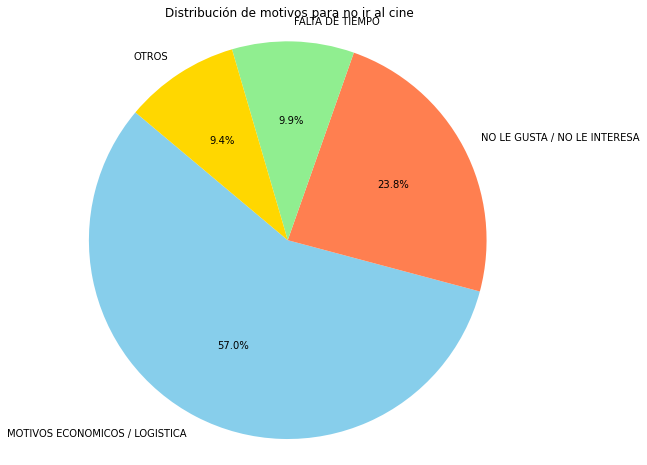

In [95]:
def agrupar_motivos(motivo):
    if motivo in ['MOTIVOS ECONOMICOS', 'NO TENGO NINGUN CINE CERCA']:
        return 'MOTIVOS ECONOMICOS / LOGISTICA'
    elif motivo in ['NO LE INTERESAN LAS PELICULAS QUE SE ESTRENAN', 'NO LE GUSTA/ NO LE INTERESA', 
                    'PREFIERE VER PELICULAS EN SU CASA']:
        return 'NO LE GUSTA / NO LE INTERESA'
    elif motivo in ['TIENE QUE CUIDAR HIJOS/AS - FAMILIARES', 'FALTA DE TIEMPO', 'NO SE DA LA OPORTUNIDAD']:
        return 'FALTA DE TIEMPO'
    #elif motivo in ['NS NC']:
        #return 'NO SABE / NO CONTESTA'
    else:
        return 'OTROS'

# Aplico la función a la columna 'CINE 2' y crear la nueva columna 'Motivos agrupados'
df_seleccionado['CINE2_agrupado'] = df_seleccionado['CINE2'].apply(agrupar_motivos)

# Cuento la frecuencia de cada categoría agrupada
print(df_seleccionado['CINE2_agrupado'].value_counts())

conteo_motivos_agrupados = df_seleccionado['CINE2_agrupado'].value_counts()

# Creo el gráfico de tortas
plt.figure(figsize=(8, 8))  # Ajusta el tamaño para mejor visualización
plt.pie(conteo_motivos_agrupados, labels=conteo_motivos_agrupados.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribución de motivos para no ir al cine')

plt.axis('equal')  
plt.show()

In [96]:
columna = df_seleccionado['CINE2_agrupado']

#Cuento las respuestas únicas y su frecuencia
conteo_respuestas = columna.value_counts()
conteo_respuestas

CINE2_agrupado
MOTIVOS ECONOMICOS / LOGISTICA    5358
NO LE GUSTA / NO LE INTERESA      2235
FALTA DE TIEMPO                    933
OTROS                              881
Name: count, dtype: int64

In [97]:
df_seleccionado

,RADIO1,NOTI1,CINE1,TV8.4,TV5_4,TV5_3,TV5_1,MUSICA9,CINE3,EDAD,PROVINCIA,NSE_SOCIOE,GENERO,CINE2,TV8.5,SOC13.1,NOTI5,SOC13_1_NUM,CINE2_agrupado
0,SI,NO,SI,4.0,NO,SI,SI,SI,TODOS O CASI TODAS LOS MESES,16.0,CORDOBA,C3,MUJER,MOTIVOS ECONOMICOS,1.0,SECUNDARIOS INCOMPLETOS,0.0,4,MOTIVOS ECONOMICOS / LOGISTICA
1,SI,SI,NO,1.0,NO,NO,SI,NO,ALGUNAS VECES AL ANIO,53.0,CORDOBA,C3,MUJER,0,1.0,SECUNDARIOS INCOMPLETOS,0.0,4,OTROS
2,NO,SI,NO,4.0,NO,NO,SI,SI,ALGUNAS VECES AL ANIO,34.0,CORDOBA,C3,VARON,0,1.0,TERCIARIOS INCOMPLETOS,0.0,6,OTROS
3,SI,SI,NO,4.0,NO,NO,SI,NO,ALGUNAS VECES AL ANIO,32.0,CORDOBA,D2E,MUJER,NO LE GUSTA/ NO LE INTERESA,1.0,PRIMARIOS INCOMPLETOS,0.0,2,NO LE GUSTA / NO LE INTERESA
4,SI,SI,NO,2.0,NO,NO,SI,NO,ALGUNAS VECES AL ANIO,89.0,CORDOBA,C3,VARON,0,1.0,SECUNDARIOS INCOMPLETOS,0.0,4,OTROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9749,NO,SI,SI,1.0,SI,NO,SI,SI,ALGUNAS VECES AL ANIO,24.0,TIERRA DEL FUEGO,C3,MUJER,MOTIVOS ECONOMICOS,1.0,SECUNDARIOS COMPLETOS,0.0,5,MOTIVOS ECONOMICOS / LOGISTICA
9750,NO,SI,NO,2.0,NO,NO,SI,SI,ALGUNAS VECES AL ANIO,72.0,TIERRA DEL FUEGO,C3,MUJER,MOTIVOS ECONOMICOS,2.0,SECUNDARIOS INCOMPLETOS,0.0,4,MOTIVOS ECONOMICOS / LOGISTICA
9751,SI,SI,NO,3.0,NO,NO,SI,SI,ALGUNAS VECES AL ANIO,42.0,TIERRA DEL FUEGO,C3,MUJER,PREFIERE VER PELICULAS EN SU CASA,2.0,TERCIARIOS COMPLETOS,0.0,7,NO LE GUSTA / NO LE INTERESA
9752,SI,SI,SI,5.0,SI,NO,SI,SI,TODOS O CASI TODAS LOS MESES,21.0,TIERRA DEL FUEGO,C3,VARON,MOTIVOS ECONOMICOS,5.0,SECUNDARIOS INCOMPLETOS,0.0,4,MOTIVOS ECONOMICOS / LOGISTICA


In [98]:
mapeo_ordinal_CINE2 = {'MOTIVOS ECONOMICOS / LOGISTICA': 1, 'FALTA DE TIEMPO': 2, 'NO LE GUSTA / NO LE INTERESA': 3, 'OTROS': 4}
print (mapeo_ordinal_CINE2)

{'MOTIVOS ECONOMICOS / LOGISTICA': 1, 'FALTA DE TIEMPO': 2, 'NO LE GUSTA / NO LE INTERESA': 3, 'OTROS': 4}


In [99]:
# Diccionario de mapeo ordinal
mapeo_ordinal_CINE2 = {'MOTIVOS ECONOMICOS / LOGISTICA': 1, 'FALTA DE TIEMPO': 2, 'NO LE GUSTA / NO LE INTERESA': 3, 'OTROS': 4}

# Aplico el mapeo a la columna 'CINE2'
df_seleccionado['CINE2_NUM'] = df_seleccionado['CINE2_agrupado'].map(mapeo_ordinal_CINE2)

# Verifico los cambios
print(df_seleccionado[['CINE2', 'CINE2_NUM']].head())
print(df_seleccionado['CINE2_NUM'].value_counts())
print(df_seleccionado.dtypes)

                         CINE2  CINE2_NUM
0           MOTIVOS ECONOMICOS          1
1                            0          4
2                            0          4
3  NO LE GUSTA/ NO LE INTERESA          3
4                            0          4
CINE2_NUM
1    5358
3    2235
2     933
4     881
Name: count, dtype: int64
RADIO1             object
NOTI1              object
CINE1              object
TV8.4             float64
TV5_4              object
TV5_3              object
TV5_1              object
MUSICA9            object
CINE3              object
EDAD              float64
PROVINCIA          object
NSE_SOCIOE         object
GENERO             object
CINE2              object
TV8.5             float64
SOC13.1            object
NOTI5             float64
SOC13_1_NUM         int64
CINE2_agrupado     object
CINE2_NUM           int64
dtype: object


In [100]:
categorias_unicas_NOTI1 = df_seleccionado['NOTI1'].unique()
print(categorias_unicas_NOTI1)

['NO' 'SI']


In [101]:
categorias_unicas_RADIO1= df_seleccionado["RADIO1"].unique()
print(categorias_unicas_RADIO1)

['SI' 'NO']


In [102]:
categorias_unicas_MUSICA9 = df_seleccionado["MUSICA9"].unique()
print(categorias_unicas_MUSICA9)

['SI' 'NO']


In [103]:
def codificar_si_no_a_numerico(df, columna):
    """Codifica una columna SI/NO a valores numéricos (1 y 0)."""

    df[columna + '_NUM'] = df[columna].map({'SI': 1, 'NO': 0})
    return df

# Ejemplo de uso
columnas_si_no = ['NOTI1', 'RADIO1', 'MUSICA9']

for columna in columnas_si_no:
    df_seleccionado = codificar_si_no_a_numerico(df_seleccionado, columna)

# Verificación de los resultados
print(df_seleccionado[['NOTI1', 'NOTI1_NUM', 'RADIO1', 'RADIO1_NUM', 'MUSICA9', 'MUSICA9_NUM']].head())
print(df_seleccionado[['NOTI1_NUM', 'RADIO1_NUM', 'MUSICA9_NUM']].dtypes)

  NOTI1  NOTI1_NUM RADIO1  RADIO1_NUM MUSICA9  MUSICA9_NUM
0    NO          0     SI           1      SI            1
1    SI          1     SI           1      NO            0
2    SI          1     NO           0      SI            1
3    SI          1     SI           1      NO            0
4    SI          1     SI           1      NO            0
NOTI1_NUM      int64
RADIO1_NUM     int64
MUSICA9_NUM    int64
dtype: object


In [104]:
valores_unicos_NSE_SOCIOE= df_seleccionado["NSE_SOCIOE"].unique()
print (valores_unicos_NSE_SOCIOE)

['C3' 'D2E' 'D1' 'C2' 'ABC1' 'SD']


In [105]:
def transformar_nse(df):
    """Transforma la columna 'NSE_SOCIOE' a datos ordinales."""

    # Mapeo inicial (sin SD)
    mapeo_nse = {
        'ABC1': 6,
        'C2': 5,
        'C3': 4,
        'D1': 3,
        'D2E': 2
    }

    # Aplico el mapeo inicial
    df['NSE_NUM'] = df['NSE_SOCIOE'].map(mapeo_nse)

    # Manejo de 'SD'
    sd_indices = df[df['NSE_SOCIOE'] == 'SD'].index

    if not sd_indices.empty: #Si hay valores SD, se procede a reemplazarlos.

      # Cálculo de frecuencias relativas
      frecuencias = df['NSE_NUM'].value_counts(normalize=True)

      # Asignación de valores numéricos a 'SD' según las frecuencias
      valores_sd = np.random.choice(frecuencias.index, size=len(sd_indices), p=frecuencias.values)
      df.loc[sd_indices, 'NSE_NUM'] = valores_sd

    return df

# Ejemplo de uso 
df_seleccionado = transformar_nse(df_seleccionado)

# Verifico los resultados
print(df_seleccionado[['NSE_SOCIOE', 'NSE_NUM']].head(10))
print(df_seleccionado['NSE_NUM'].value_counts())
print(df_seleccionado.dtypes)

  NSE_SOCIOE  NSE_NUM
0         C3      4.0
1         C3      4.0
2         C3      4.0
3        D2E      2.0
4         C3      4.0
5         C3      4.0
6         C3      4.0
7        D2E      2.0
8         D1      3.0
9         D1      3.0
NSE_NUM
3.0    2801
4.0    2789
5.0    1583
2.0    1484
6.0     750
Name: count, dtype: int64
RADIO1             object
NOTI1              object
CINE1              object
TV8.4             float64
TV5_4              object
TV5_3              object
TV5_1              object
MUSICA9            object
CINE3              object
EDAD              float64
PROVINCIA          object
NSE_SOCIOE         object
GENERO             object
CINE2              object
TV8.5             float64
SOC13.1            object
NOTI5             float64
SOC13_1_NUM         int64
CINE2_agrupado     object
CINE2_NUM           int64
NOTI1_NUM           int64
RADIO1_NUM          int64
MUSICA9_NUM         int64
NSE_NUM           float64
dtype: object


In [106]:
def codificar_provincias_numericamente(df):
    """Codifica la columna 'PROVINCIA' a valores numéricos únicos."""

    # Obtención de valores únicos y creación de un mapeo
    provincias_unicas = df_seleccionado['PROVINCIA'].unique()
    mapeo_provincias = {provincia: i for i, provincia in enumerate(provincias_unicas)}

    # Aplico el mapeo a la columna 'PROVINCIA'
    df_seleccionado['PROV_NUM'] = df_seleccionado['PROVINCIA'].map(mapeo_provincias)

    return df

# Ejemplo de uso 
df_seleccionado = codificar_provincias_numericamente(df_seleccionado)

# Verifico los resultados
print(df_seleccionado[['PROVINCIA', 'PROV_NUM']].head(20))
print(df_seleccionado['PROV_NUM'].value_counts())
print(df_seleccionado.dtypes)

   PROVINCIA  PROV_NUM
0    CORDOBA         0
1    CORDOBA         0
2    CORDOBA         0
3    CORDOBA         0
4    CORDOBA         0
5    CORDOBA         0
6    CORDOBA         0
7    CORDOBA         0
8    CORDOBA         0
9    CORDOBA         0
10   CORDOBA         0
11   CORDOBA         0
12   CORDOBA         0
13   CORDOBA         0
14   CORDOBA         0
15   CORDOBA         0
16   CORDOBA         0
17   CORDOBA         0
18   CORDOBA         0
19   CORDOBA         0
PROV_NUM
2     1648
23    1001
7      822
0      519
5      482
12     478
11     426
6      417
17     413
1      360
10     346
14     327
20     312
19     278
3      237
22     229
4      217
18     198
9      182
15     156
21     104
8       94
16      82
13      79
Name: count, dtype: int64
RADIO1             object
NOTI1              object
CINE1              object
TV8.4             float64
TV5_4              object
TV5_3              object
TV5_1              object
MUSICA9            object
CINE3     

In [107]:
df_seleccionado['PROVINCIA'].unique()

array(['CORDOBA', 'MISIONES', 'BUENOS AIRES', 'LA PAMPA', 'FORMOSA',
       'SANTA FE', 'CORRIENTES', 'MENDOZA', 'LA RIOJA',
       'SANTIAGO DEL ESTERO', 'SAN JUAN', 'NEUQUEN', 'TUCUMAN',
       'TIERRA DEL FUEGO', 'CHUBUT', 'ENTRE RIOS', 'SANTA CRUZ', 'CHACO',
       'SAN LUIS', 'JUJUY', 'SALTA', 'CATAMARCA', 'RIO NEGRO',
       'CIUDAD AUTONOMA DE BUENOS AIRES'], dtype=object)

In [108]:
def codificar_provincias_y_regiones_numericamente(df):
    """Codifica la columna 'PROVINCIA' a valores numéricos únicos y asigna números a las regiones."""

    # Obtención de valores únicos y mapeo de provincias a números
    provincias_unicas = df_seleccionado['PROVINCIA'].unique()
    mapeo_provincias = {provincia: i for i, provincia in enumerate(provincias_unicas)}

    # Aplico el mapeo a la columna 'PROVINCIA'
    df_seleccionado['PROV_NUM'] = df_seleccionado['PROVINCIA'].map(mapeo_provincias)

    # Mapeo de provincias a regiones
    mapeo_regiones = {
        'CORDOBA': 'Centro',
        'MISIONES': 'Noreste',
        'BUENOS AIRES': 'Centro',
        'LA PAMPA': 'Centro',
        'FORMOSA': 'Noreste',
        'SANTA FE': 'Centro',
        'CORRIENTES': 'Noreste',
        'MENDOZA': 'Cuyo',
        'LA RIOJA': 'Noroeste',
        'SANTIAGO DEL ESTERO': 'Noroeste',
        'SAN JUAN': 'Cuyo',
        'NEUQUEN': 'Patagonia',
        'TUCUMAN': 'Noroeste',
        'TIERRA DEL FUEGO': 'Patagonia',
        'CHUBUT': 'Patagonia',
        'ENTRE RIOS': 'Centro',
        'SANTA CRUZ': 'Patagonia',
        'CHACO': 'Noreste',
        'SAN LUIS': 'Cuyo',
        'JUJUY': 'Noroeste',
        'SALTA': 'Noroeste',
        'CATAMARCA': 'Noroeste',
        'RIO NEGRO': 'Patagonia',
        'CIUDAD AUTONOMA DE BUENOS AIRES': 'Centro'
    }

    # Creo la columna 'REGION'
    df_seleccionado['REGION'] = df_seleccionado['PROVINCIA'].map(mapeo_regiones)

    # Mapeo de regiones a números
    regiones_unicas = df_seleccionado['REGION'].unique()
    mapeo_regiones_numerico = {region: i for i, region in enumerate(regiones_unicas)}

    # Creo la columna 'REGION_NUM'
    df_seleccionado['REGION_NUM'] = df_seleccionado['REGION'].map(mapeo_regiones_numerico)

    return df_seleccionado

# Ejemplo de uso
df_seleccionado = codificar_provincias_y_regiones_numericamente(df_seleccionado)

# Verificación de los resultados
print(df_seleccionado[['PROVINCIA', 'PROV_NUM', 'REGION', 'REGION_NUM']].head(20))
print(df_seleccionado['REGION_NUM'].value_counts())

   PROVINCIA  PROV_NUM  REGION  REGION_NUM
0    CORDOBA         0  Centro           0
1    CORDOBA         0  Centro           0
2    CORDOBA         0  Centro           0
3    CORDOBA         0  Centro           0
4    CORDOBA         0  Centro           0
5    CORDOBA         0  Centro           0
6    CORDOBA         0  Centro           0
7    CORDOBA         0  Centro           0
8    CORDOBA         0  Centro           0
9    CORDOBA         0  Centro           0
10   CORDOBA         0  Centro           0
11   CORDOBA         0  Centro           0
12   CORDOBA         0  Centro           0
13   CORDOBA         0  Centro           0
14   CORDOBA         0  Centro           0
15   CORDOBA         0  Centro           0
16   CORDOBA         0  Centro           0
17   CORDOBA         0  Centro           0
18   CORDOBA         0  Centro           0
19   CORDOBA         0  Centro           0
REGION_NUM
0    4043
3    1448
1    1407
2    1366
4    1143
Name: count, dtype: int64


In [109]:
df_seleccionado['PROV_NUM'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

#### Columnas elegidas para entrenar el modelo:
NOTI1: Leyó noticias en el diario ultimo año?, CINE2: Cuál es el principal motivo por el que no fue al cine?, RADIO1: Escuchó radio en el ultimo año?, MUSICA 9: Esuchó musica en vivo?, GENERO, PROVINCIA, SOC13.1, NSE_NUM, EDAD

In [110]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

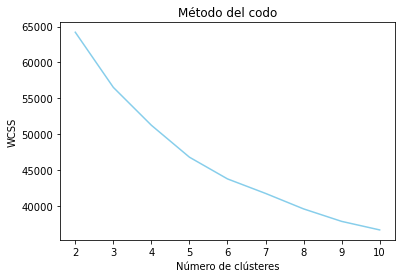

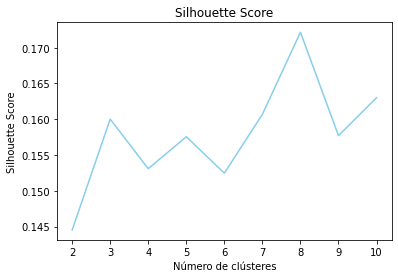

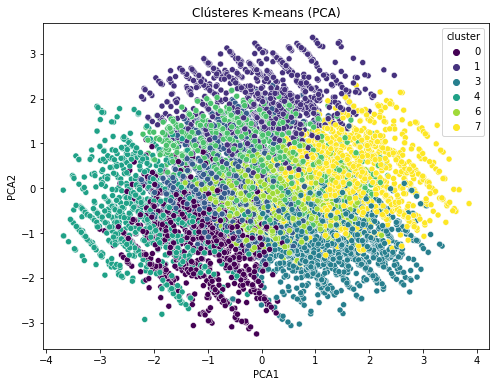

cluster
6    1711
2    1449
3    1260
7    1107
1    1091
5     983
0     969
4     837
Name: count, dtype: int64


In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Selecciono las columnas a normalizar y para el clustering
columnas_seleccionadas = ['CINE2_NUM', 'NSE_NUM', 'REGION_NUM', 'SOC13_1_NUM', 'RADIO1_NUM', 'NOTI1_NUM', 'MUSICA9_NUM', 'EDAD']
X = df_seleccionado[columnas_seleccionadas].copy() #Se hace una copia para evitar warnings.

# Normalizo los datos con StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ajuste de hiperparámetros de K-means (método del codo y silhouette score)
wcss = []
silhouette_scores = []
for i in range(2, 11):  # Prueba de 2 a 10 clústeres
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Gráfico del método del codo
plt.plot(range(2, 11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clústeres')
plt.ylabel('WCSS')
plt.show()

# Gráfico del silhouette score
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Número de clústeres')
plt.ylabel('Silhouette Score')
plt.show()

# Elijo el número óptimo de clústeres basado en los gráficos
n_clusters_optimo = 8 
#El número 3 fue cambiado por el numero 8 dado que el gráfico de silhouette mostraba el pico en dicho valor.

# Entreno el modelo K-means con los hiperparámetros óptimos
kmeans = KMeans(n_clusters=n_clusters_optimo, init='k-means++', random_state=42)
df_seleccionado['cluster'] = kmeans.fit_predict(X_scaled) #Se añade la columna cluster al df_seleccionado

#Aplico PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df_seleccionado['PCA1'] = pca_result[:, 0]
df_seleccionado['PCA2'] = pca_result[:, 1]

# Visualizo los clústeres
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df_seleccionado, palette='viridis')
plt.title('Clústeres K-means (PCA)')
plt.show()

#Creo una nueva columna con las etiquetas de los clústeres
df_seleccionado['cluster'] = kmeans.labels_

#Analisis de los resultados
print(df_seleccionado['cluster'].value_counts()) #Contamos la frecuencia de los clusters.

In [112]:
#Calcula los promedios por clúster
centroides = df_seleccionado.groupby('cluster')[columnas_seleccionadas].mean()

#Imprime los centroides
print(centroides)

         CINE2_NUM   NSE_NUM  REGION_NUM  SOC13_1_NUM  RADIO1_NUM  NOTI1_NUM  \
cluster                                                                        
0         1.861713  4.987616    1.234262     7.896801    0.900929   0.860681   
1         1.421632  3.736939    1.156737     4.659945    0.280477   0.000000   
2         1.503106  3.623188    1.538992     4.387854    1.000000   0.835059   
3         3.316667  3.293651    1.720635     4.033333    0.959524   1.000000   
4         1.524492  4.861410    1.183990     7.959379    0.806452   0.863799   
5         1.745677  3.532045    1.381485     4.738555    0.000000   1.000000   
6         1.156634  3.361192    1.402104     4.209234    1.000000   1.000000   
7         2.502258  3.017164    1.310750     3.680217    0.853659   0.000000   

         MUSICA9_NUM       EDAD  
cluster                          
0           0.000000  45.493292  
1           0.175069  25.454629  
2           1.000000  32.974465  
3           0.067460  55.5960

## Análisis y Conclusiones

A continuación, analizamos los resultados promedio de los centroides para los 8 clústeres.

Interpretación de los centroides:

CINE2_NUM:
Clúster 0: Tiene el valor promedio más bajo (1.289588), lo que sugiere que las personas en este clúster tienden a no ir al cine principalmente por "MOTIVOS ECONÓMICOS".
Clúster 3: Tiene el valor promedio más alto (3.386960), lo que sugiere que las personas en este clúster tienden a no ir al cine principalmente por "OTROS" motivos.
Los demás clústeres tienen valores intermedios, lo que indica una distribución más equilibrada entre las razones para no ir al cine.
NSE_NUM:
Clúster 4 y 5: Tienen los valores promedio más altos (4.993915 y 4.886839), lo que indica que las personas en estos clústeres tienden a pertenecer a niveles socioeconómicos más altos.
Clúster 0 y 3: Tienen los valores promedio más bajos (3.338395 y 3.207654), lo que indica que las personas en estos clústeres tienden a pertenecer a niveles socioeconómicos más bajos.
Los demás clústeres tienen valores intermedios.
REGION_NUM:
Los valores promedio de 'REGION_NUM' varían entre los clústeres, lo que sugiere diferencias regionales en la distribución de los grupos. Para una interpretación precisa, se necesitaría el mapeo entre los números y las regiones reales.
SOC13_1_NUM:
Clúster 4 y 5: Tienen los valores promedio más altos (7.809331 y 7.971710), lo que indica que las personas en estos clústeres tienden a tener niveles educativos más altos.
Clúster 0 y 3: Tienen los valores promedio más bajos (4.225054 y 3.794472), lo que indica que las personas en estos clústeres tienden a tener niveles educativos más bajos.
Los demás clústeres tienen valores intermedios.
RADIO1_NUM:
Clúster 0, 2, 3, 4 y 5: Tienen valores promedio altos (cercanos a 1), lo que sugiere que las personas en estos clústeres tienden a escuchar mucho la radio.
Clúster 1 y 6: Tienen valores promedio bajos (0), lo que indica que las personas en estos clústeres casi no escuchan la radio.
NOTI1_NUM:
Clúster 0, 2, 4 y 5: Tienen valores promedio altos (cercanos a 1), lo que sugiere que las personas en estos clústeres tienden a ver muchas noticias.
Clúster 1, 3 y 6: Tienen valores promedio más bajos, lo que indica que las personas en estos clústeres tienden a ver menos noticias.
MUSICA9_NUM:
Clúster 2 y 5: Tienen valores promedio altos (1), lo que sugiere que las personas en estos clústeres tienden a escuchar mucha música.
Clúster 0, 3 y 4: Tienen valores promedio bajos (cercanos a 0), lo que indica que las personas en estos clústeres casi no escuchan música.
Los demás clústeres tienen valores intermedios.
EDAD:
Clúster 3: Tiene el valor promedio de edad más alto (61.848335), lo que sugiere que las personas en este clúster tienden a ser mayores.
Clúster 6: Tiene el valor promedio de edad más bajo (32.619355), lo que sugiere que las personas en este clúster tienden a ser más jóvenes.
Los demás clústeres tienen valores promedio de edad intermedios.

Resumen de los clústeres:

Clúster 0: Personas de nivel socioeconómico bajo, con niveles educativos bajos, que escuchan mucha radio y ven noticias, y no escuchan música.
Clúster 1: Personas jóvenes, que no escuchan radio, ven noticias y escuchan algo de música.
Clúster 2: Personas que escuchan mucha radio, ven noticias y escuchan música.
Clúster 3: Personas mayores, de nivel socioeconómico bajo, con niveles educativos bajos, que escuchan radio y ven algunas noticias, y no escuchan música.
Clúster 4: Personas de nivel socioeconómico y educativo alto, que escuchan radio y ven noticias, y no escuchan música.
Clúster 5: Personas de nivel socioeconómico y educativo alto, que escuchan radio, ven noticias y escuchan música.
Clúster 6: Personas jóvenes, que no escuchan radio ni ven noticias, y escuchan algo de música.
Clúster 7: Personas de nivel socioeconómico bajo, con niveles educativos bajos, que escuchan radio y no ven noticias, y escuchan algo de música.

El análisis de clústeres revela la existencia de ocho grupos distintos dentro del conjunto de datos, cada uno con características demográficas, socioeconómicas y de comportamiento únicas. Estos grupos difieren significativamente en sus preferencias de entretenimiento (cine, música, radio), consumo de noticias, nivel socioeconómico, nivel educativo y edad.

Principales hallazgos:

Segmentación clara: Se identifican grupos con patrones de consumo de medios muy diferenciados. Algunos clústeres prefieren la radio y las noticias, mientras que otros se inclinan por la música.
Disparidad socioeconómica y educativa: Los clústeres varían considerablemente en términos de nivel socioeconómico y educativo, lo que influye en sus preferencias de entretenimiento y consumo de noticias.
Diferencias generacionales: La edad es un factor clave en la segmentación, con un clúster dominado por personas mayores y otro por personas jóvenes.
Motivaciones para no ir al cine: Los clústeres también difieren en sus principales razones para no ir al cine, desde motivos económicos hasta falta de tiempo u otras razones.


Estos datos esbozados a modo de resumen sirven para categorizar los tipos de consumos culturales en la Argentina. No solo muestran un panorama rapido de las caracteristicas de los consumidores de medios de comunicación sino que también sirven a diversas organizaciones y empresas para conocer mejor el perfil de sus públicos y poder asi direccionar de manera más eficiente sus esfuerzos en la construcción y transmisión de sus mensajes masivos. En sintesis, estos clústeres pueden representar segmentos de mercado distintos que requieren estrategias de marketing personalizadas. 